<table align="center" style="text-align:center; border-collapse:collapse; border-spacing:0; width:100%;">
    <tr>
        <td style="width:25%; padding:0;">
            <img src="../docs/_static/astronuc-header.png" style="max-width:100%;" />
        </td>
        <td style="width:50%; padding:0;">
            <h1 style="font-size:50px">
                AstroNuc 2026<br><code>cogsworth</code> tutorial
            </h1>
            <h2 style="font-size:20px;">
                <i>led by <a href="https://www.tomwagg.com">Tom Wagg</a> (Postdoc at the Flatiron Institute)</i>
            </h2>
            <p style="font-size:15px;">
                This lab focuses on how to track the timing and location of SNe in galaxies with <code>cogsworth</code>
            </p>
        </td>
        <td style="width:25%; padding:0;">
            <img src="../docs/_static/astronuc-header.png" style="max-width:100%;" />
        </td>
    </tr>
</table>

In [1]:
import cogsworth
import gala.potential as gp
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# this makes sure every column in Pandas dataframes is shown
pd.set_option('display.max_columns', None)

# Part 1: Your first population

## Demo

More detailed explanations of all of this code can be found [on the lab page](https://teamcogsworth.github.io/cogsworth-school/pages/labs/astronuc/part-1.html#demo).

### Initialise a Population

In [4]:
p = cogsworth.pop.Population(
    n_binaries=100,
    use_default_BSE_settings=True
)
p

<Population - 100 systems - galactic_potential=MilkyWayPotential, SFH=Wagg2022>

### Initial sampling

In [5]:
p.sample_initial_binaries()

In [6]:
p.initial_binaries.head()

index  kstar_1  kstar_2    mass_1    mass_2         porb       ecc  \
0      0      1.0      1.0  1.023699  0.846729   200.238245  0.584425   
1      1      0.0      0.0  0.511650  0.509950    86.006966  0.249694   
2      2      0.0      0.0  0.171123  0.080835   118.918317  0.218968   
3      3      0.0      0.0  0.248562  0.163282  3191.947642  0.062489   
4      4      0.0      0.0  0.163609  0.135845     1.777714  0.107270   

   metallicity        tphysf   mass0_1   mass0_2  rad_1  rad_2  lum_1  lum_2  \
0     0.008227  10166.590613  1.023699  0.846729    0.0    0.0    0.0    0.0   
1     0.008741   7913.923443  0.511650  0.509950    0.0    0.0    0.0    0.0   
2     0.002577  11797.415834  0.171123  0.080835    0.0    0.0    0.0    0.0   
3     0.003930   7696.724988  0.248562  0.163282    0.0    0.0    0.0    0.0   
4     0.007760   9120.470488  0.163609  0.135845    0.0    0.0    0.0    0.0   

   massc_1  massc_2  radc_1  radc_2  menv_1  menv_2  renv_1  renv_2  \
0      0.0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1      0.0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2      0.0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3      0.0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4      0.0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   omega_spin_1  omega_spin_2  B_1  B_2  bacc_1  bacc_2  tacc_1  tacc_2  \
0           0.0           0.0  0.0  0.0     0.0     0.0     0.0     0.0   
1           0.0           0.0  0.0  0.0     0.0     0.0     0.0     0.0   
2           0.0           0.0  0.0  0.0     0.0     0.0     0.0     0.0   
3           0.0           0.0  0.0  0.0     0.0     0.0     0.0     0.0   
4           0.0           0.0  0.0  0.0     0.0     0.0     0.0     0.0   

   epoch_1  epoch_2  tms_1  tms_2  bhspin_1  bhspin_2  tphys  binfrac  
0      0.0      0.0    0.0    0.0       0.0       0.0    0.0      0.5  
1      0.0      0.0    0.0    0.0       0.0       0.0    0.0      0.5  
2      0.0      0.0    0.0    0.0       0.0       0.0    0.0      0.5  
3      0.0      0.0    0.0    0.0       0.0       0.0    0.0      0.5  
4      0.0      0.0    0.0    0.0       0.0       0.0    0.0      0.5

In [7]:
p.initial_galaxy

<Wagg2022, size=126>

In [8]:
print(p.initial_galaxy.positions)
print(p.initial_galaxy.tau)

[[ 1.37663696e+00  4.44284278e+00  7.20054994e-01 -2.87353341e+00
   2.71049613e+00 -5.01795565e+00  2.68254513e+00 -2.11025967e+00
  -4.57216056e+00 -8.67465697e+00 -5.27895870e-01  6.34899617e-01
  -8.01945115e+00 -2.91543537e+00  3.86559188e-01 -2.99487279e+00
   4.99423644e+00  1.02594003e+01  8.35987557e-01  1.01421967e+01
   1.56669197e+00 -1.37713634e-01 -3.47288369e+00  1.65854000e+00
   4.52042944e+00 -2.00977495e+00 -1.65973248e+01 -8.08415548e+00
  -1.21237673e+01 -4.17023517e+00  1.07948725e+00  1.58141697e+01
  -3.51388328e+00 -2.75839498e+00  1.97775827e+00 -1.48728254e+00
   3.44213596e+00 -2.49700799e+00 -3.79199996e+00 -4.28804062e+00
  -2.34615428e+00 -1.05676163e+00  8.85103146e+00 -2.30748512e+00
   5.36704160e+00  3.78997526e+00  1.97494680e-02 -5.60738430e+00
   2.01942232e-01 -1.66759551e+00 -3.50847802e-01 -1.87591959e-02
  -2.82168165e+00  2.65180520e+00 -1.99685990e+00  8.13693474e-01
  -6.73040724e-01 -1.57516916e+01 -8.08836949e+00 -7.49011073e+00
   4.36171

### Stellar evolution

In [9]:
p.perform_stellar_evolution()

In [10]:
p.bpp.loc[:5]

tphys    mass_1    mass_2  kstar_1  kstar_2         sep  \
0      0.000000  1.023699  0.846729        1        1  177.404084   
0   8745.041133  1.023699  0.846729        2        1  177.404215   
0   9148.747171  1.023213  0.846730        3        1  177.450125   
0   9754.908004  0.982456  0.850491        3        1  112.732230   
0   9754.908004  0.982456  0.850491        3        1  112.732230   
0   9754.908004  0.362538  0.850491       10        1    8.627241   
0   9754.908004  0.362538  0.850491       10        1    8.627241   
0  10166.590613  0.362538  0.850491       10        1    8.592978   
1      0.000000  0.511650  0.509950        0        0   82.553333   
1   7913.923443  0.511650  0.509950        0        0   82.553318   
2      0.000000  0.171123  0.080835        0        0   64.253067   
2  11797.415834  0.171123  0.080835        0        0   64.253067   
3      0.000000  0.248562  0.163282        0        0  678.526133   
3   7696.724988  0.248562  0.163282        0        0  678.526133   
4      0.000000  0.163609  0.135845        0        0    4.130192   
4   9120.470488  0.163609  0.135845        0        0    4.128112   
5      0.000000  0.872940  0.218302        1        0    7.131652   
5  11124.119423  0.872940  0.218302        1        0    6.405311   

          porb       ecc    RRLO_1    RRLO_2  evol_type          aj_1  \
0   200.238245  0.584425  0.031668  0.028601          1      0.000000   
0   200.238467  0.584425  0.061339  0.032290          2   8745.041133   
0   200.342231  0.584425  0.077467  0.032518          2   9164.611816   
0   102.463539  0.000000  1.000413  0.021390          3   9770.772650   
0   102.463539  0.000000  1.000413  0.021390          7   9770.772650   
0     2.666517  0.000000  0.000378  0.021390          8      0.000000   
0     2.666517  0.000000  0.006285  0.225535          4      0.000000   
0     2.650648  0.000000  0.006310  0.228355         10    411.682609   
1    86.006966  0.249694  0.019959  0.019920          1      0.000000   
1    86.006942  0.249694  0.020254  0.020213         10   7913.923443   
2   118.918317  0.218968  0.008782  0.009576          1      0.000000   
2   118.918316  0.218968  0.008805  0.009576         10  11797.415834   
3  3191.947642  0.062489  0.000986  0.000875          1      0.000000   
3  3191.947642  0.062489  0.000989  0.000876         10   7696.724988   
4     1.777714  0.107270  0.134177  0.125652          1      0.000000   
4     1.776371  0.107154  0.134432  0.125832         10   9120.470488   
5     2.112987  0.180633  0.274226  0.151428          1      0.000000   
5     1.798548  0.000000  0.394660  0.138710         10  11124.119423   

           aj_2         tms_1         tms_2  massc_he_layer_1  \
0      0.000000  8.745041e+03  1.822139e+04          0.000000   
0   8745.041133  8.745041e+03  1.822139e+04          0.118565   
0   9148.723080  8.760529e+03  1.822134e+04          0.156534   
0   9584.752256  8.760529e+03  1.790327e+04          0.362538   
0   9584.752256  8.760529e+03  1.790327e+04          0.362538   
0   9584.752256  8.760529e+03  1.790327e+04          0.362538   
0   9584.752256  1.000000e+10  1.790327e+04          0.362538   
0   9996.434864  1.000000e+10  1.790327e+04          0.362538   
1      0.000000  1.121928e+05  1.132532e+05          0.000000   
1   7913.923443  1.121928e+05  1.132532e+05          0.000000   
2      0.000000  1.011806e+06  4.533923e+06          0.000000   
2  11797.415834  1.011806e+06  4.533923e+06          0.000000   
3      0.000000  5.131467e+05  1.193438e+06          0.000000   
3   7696.724988  5.131467e+05  1.193438e+06          0.000000   
4      0.000000  1.297214e+06  1.881624e+06          0.000000   
4   9120.470488  1.297214e+06  1.881624e+06          0.000000   
5      0.000000  1.233473e+04  6.295033e+05          0.000000   
5  11124.119423  1.233473e+04  6.295033e+05          0.000000   

   massc_he_layer_2  massc_co_layer_1  massc_co_layer_2      rad_1     rad

In [11]:
p.kick_info.loc[:5]

star  disrupted  natal_kick  phi  theta  mean_anomaly  delta_vsysx_1  \
0   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
0   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
1   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
1   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
2   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
2   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
3   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
3   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
4   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
4   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
5   0.0        0.0         0.0  0.0    0.0           0.0            0.0   
5   0.0        0.0         0.0  0.0    0.0           0.0            0.0   

   delta_vsysy_1  delta_vsysz_1  vsys_1_total  delta_vsysx_2  delta_vsysy_2  \
0            0.0            0.0           0.0            0.0            0.0   
0            0.0            0.0           0.0            0.0            0.0   
1            0.0            0.0           0.0            0.0            0.0   
1            0.0            0.0           0.0            0.0            0.0   
2            0.0            0.0           0.0            0.0            0.0   
2            0.0            0.0           0.0            0.0            0.0   
3            0.0            0.0           0.0            0.0            0.0   
3            0.0            0.0           0.0            0.0            0.0   
4            0.0            0.0           0.0            0.0            0.0   
4            0.0            0.0           0.0            0.0            0.0   
5            0.0            0.0           0.0            0.0            0.0   
5            0.0            0.0           0.0            0.0            0.0   

   delta_vsysz_2  vsys_2_total  theta_euler  phi_euler  psi_euler  randomseed  \
0            0.0           0.0          0.0        0.0        0.0         0.0   
0            0.0           0.0          0.0        0.0        0.0         0.0   
1            0.0           0.0          0.0        0.0        0.0         0.0   
1            0.0           0.0          0.0        0.0        0.0         0.0   
2            0.0           0.0          0.0        0.0        0.0         0.0   
2            0.0           0.0          0.0        0.0        0.0         0.0   
3            0.0           0.0          0.0        0.0        0.0         0.0   
3            0.0           0.0          0.0        0.0        0.0         0.0   
4            0.0           0.0          0.0        0.0        0.0         0.0   
4            0.0           0.0          0.0        0.0        0.0         0.0   
5            0.0           0.0          0.0        0.0        0.0         0.0   
5            0.0           0.0          0.0        0.0        0.0         0.0   

   bin_num  
0      0.0  
0      0.0  
1      1.0  
1      1.0  
2      2.0  
2      2.0  
3      3.0  
3      3.0  
4      4.0  
4      4.0  
5      5.0  
5      5.0

In [12]:
p.final_bpp.loc[:5]

tphys    mass_1    mass_2  kstar_1  kstar_2         sep  \
0  10166.590613  0.362538  0.850491       10        1    8.592978   
1   7913.923443  0.511650  0.509950        0        0   82.553318   
2  11797.415834  0.171123  0.080835        0        0   64.253067   
3   7696.724988  0.248562  0.163282        0        0  678.526133   
4   9120.470488  0.163609  0.135845        0        0    4.128112   
5  11124.119423  0.872940  0.218302        1        0    6.405311   

          porb       ecc    RRLO_1    RRLO_2  evol_type          aj_1  \
0     2.650648  0.000000  0.006310  0.228355         10    411.682609   
1    86.006942  0.249694  0.020254  0.020213         10   7913.923443   
2   118.918316  0.218968  0.008805  0.009576         10  11797.415834   
3  3191.947642  0.062489  0.000989  0.000876         10   7696.724988   
4     1.776371  0.107154  0.134432  0.125832         10   9120.470488   
5     1.798548  0.000000  0.394660  0.138710         10  11124.119423   

           aj_2         tms_1         tms_2  massc_he_layer_1  \
0   9996.434864  1.000000e+10  1.790327e+04          0.362538   
1   7913.923443  1.121928e+05  1.132532e+05          0.000000   
2  11797.415834  1.011806e+06  4.533923e+06          0.000000   
3   7696.724988  5.131467e+05  1.193438e+06          0.000000   
4   9120.470488  1.297214e+06  1.881624e+06          0.000000   
5  11124.119423  1.233473e+04  6.295033e+05          0.000000   

   massc_he_layer_2  massc_co_layer_1  massc_co_layer_2     rad_1     rad_2  \
0               0.0               0.0               0.0  0.016702  0.891279   
1               0.0               0.0               0.0  0.475742  0.474054   
2               0.0               0.0               0.0  0.196669  0.151969   
3               0.0               0.0               0.0  0.261557  0.191255   
4               0.0               0.0               0.0  0.195776  0.168326   
5               0.0               0.0               0.0  1.267427  0.237778   

    mass0_1   mass0_2     lum_1     lum_2        teff_1       teff_2  \
0  0.362538  0.850491  0.002552  0.656858  10083.100789  5528.798163   
1  0.511650  0.509950  0.045977  0.045472   3892.405600  3888.580328   
2  0.171123  0.080835  0.005340  0.000467   3534.108192  2186.542035   
3  0.248562  0.163282  0.010756  0.004490   3650.881514  3431.852814   
4  0.163609  0.135845  0.004000  0.002470   3295.402202  3150.299573   
5  0.872940  0.218302  1.913919  0.008805   6057.438839  3642.227903   

     radc_1  radc_2        menv_1    menv_2        renv_1    renv_2  \
0  0.016702     0.0  1.000000e-10  0.053946  1.000000e-10  0.278024   
1  0.000000     0.0  1.416865e-01  0.142871  1.841582e-01  0.184018   
2  0.000000     0.0  8.556164e-02  0.040417  1.278347e-01  0.098780   
3  0.000000     0.0  2.485620e-01  0.081641  2.615567e-01  0.124315   
4  0.000000     0.0  8.180466e-02  0.067923  1.272543e-01  0.109412   
5  0.000000     0.0  6.918858e-02  0.109151  5.089530e-01  0.154556   

   omega_spin_1  omega_spin_2  B_1  B_2  bacc_1  bacc_2  tacc_1  tacc_2  \
0     22.396940    252.966687  0.0  0.0     0.0     0.0     0.0     0.0   
1      6.645105      6.497883  0.0  0.0     0.0     0.0     0.0     0.0   
2      0.003059      0.000011  0.0  0.0     0.0     0.0     0.0     0.0   
3      0.042744      0.002181  0.0  0.0     0.0     0.0     0.0     0.0   
4     48.777519     41.678759  0.0  0.0     0.0     0.0     0.0     0.0   
5   1271.920804    292.864005  0.0  0.0     0.0     0.0     0.0     0.0   

       epoch_1     epoch_2  bhspin_1  bhspin_2  bin_num  metallicity  
0  9754.908004  170.155749       0.0       0.0        0     0.008227  
1     0.000000    0.000000       0.0       0.0        1     0.008741  
2     0.000000    0.000000       0.0       0.0        2     0.002577  
3     0.000000    0.000000       0.0       0.0        3     0.003930  
4     0.000000    0.000000       0.0       0.0        4     0.007760  
5     0.000000    0.000000       0.0       0.0   

### Galactic orbit integration

In [13]:
p.perform_galactic_evolution()

127it [00:00, 1597.25it/s]             


In [14]:
p.orbits[:5]

array([<Orbit cartesian, dim=3, shape=(10167,)>,
       <Orbit cartesian, dim=3, shape=(7914,)>,
       <Orbit cartesian, dim=3, shape=(11798,)>,
       <Orbit cartesian, dim=3, shape=(7697,)>,
       <Orbit cartesian, dim=3, shape=(9121,)>], dtype=object)

### Future shortcut

### Inspect the most massive binary

Let's find the binary with the most massive primary star at ZAMS and take a look at its evolution.

In [15]:
most_massive = p.bin_nums[p.initial_binaries["mass_1"].argmax()]

In [16]:
p.bpp.loc[most_massive]

tphys     mass_1    mass_2  kstar_1  kstar_2           sep  \
68      0.000000  19.793251  7.061536        1        1  18535.400820   
68     10.147531  19.587916  7.060762        2        1  18678.759716   
68     10.165527  19.585957  7.060760        4        1  18680.134418   
68     11.178817  18.860920  7.061493        5        1  19197.868536   
68     11.196219  18.794152  7.061675        5        1  19246.311633   
68     11.196219   6.460308  7.061675       14        1     -1.000000   
68     47.445166   6.460308  7.053634       14        2     -1.000000   
68     47.626186   6.460308  7.052701       14        3     -1.000000   
68     47.645868   6.460308  7.052188       14        4     -1.000000   
68     52.816790   6.460308  6.937936       14        5     -1.000000   
68     52.989131   6.460308  6.902627       14        5     -1.000000   
68     52.989131   6.460308  1.277584       14       13     -1.000000   
68  11721.998209   6.460308  1.277584       14       13     -1.000000   

            porb       ecc    RRLO_1    RRLO_2  evol_type          aj_1  \
68  56437.046494  0.091554  0.000574  0.000491          1      0.000000   
68  57313.426987  0.091554  0.001364  0.000535          2     10.224782   
68  57321.863550  0.091554  0.004657  0.000535          2     10.242778   
68  60549.974949  0.091546  0.103320  0.000520          2     11.256068   
68  60857.514561  0.091544  0.103320  0.000520         15     11.273469   
68     -1.000000 -1.000000  0.000000 -2.000000         11     11.273469   
68     -1.000000 -1.000000  0.000100  0.000100          2     36.248947   
68     -1.000000 -1.000000  0.000100  0.000100          2     36.429967   
68     -1.000000 -1.000000  0.000100  0.000100          2     36.449650   
68     -1.000000 -1.000000  0.000100  0.000100          2     41.620571   
68     -1.000000 -1.000000  0.000100  0.000100         16     41.792912   
68     -1.000000 -1.000000  0.000100  0.000100          2     41.792912   
68     -1.000000 -1.000000  0.000100  0.000100         10  11710.801991   

            aj_2         tms_1         tms_2  massc_he_layer_1  \
68      0.000000  1.010155e+01  4.741817e+01          0.000000   
68     10.148593  1.022478e+01  4.742774e+01          5.337743   
68     10.166593  1.022478e+01  4.742776e+01          5.444492   
68     11.177750  1.022478e+01  4.741869e+01          1.981124   
68     11.194620  1.022478e+01  4.741644e+01          1.709587   
68     11.194620  1.022478e+01  4.741644e+01          1.709587   
68     47.516043  1.000000e+10  4.751604e+01          0.000000   
68     47.708694  1.000000e+10  4.752762e+01          0.000000   
68     47.728377  1.000000e+10  4.752762e+01          0.000000   
68     52.899299  1.000000e+10  4.752762e+01          0.000000   
68     53.070184  1.000000e+10  4.752762e+01          0.000000   
68      0.000000  1.000000e+10  4.752762e+01          0.000000   
68  11669.009078  1.000000e+10  1.000000e+10          0.000000   

    massc_he_layer_2  massc_co_layer_1  massc_co_layer_2        rad_1  \
68          0.000000          0.000000          0.000000     4.546628   
68          0.000000          0.000000          0.000000    10.858029   
68          0.000000          0.000000          0.000000    37.072563   
68          0.000000          5.430669          0.000000   839.260643   
68          0.000000          5.702206          0.000000  1020.532166   
68          0.000000          5.702206          0.000000  1020.532166   
68          1.343750          0.000000          0.000000     0.000027   
68          1.370419          0.000000          0.000000     0.000027   
68          1.371416          0.000000          0.000000     0.000027   
68          1.113115          0.000000          1.137721     0.000027   
68          0.810836          0.000000          1.440000     0.000027   
68          0.000000          0.000000          0.000000     0.000027   
68          0.000000          0.000000          0.000000     0.

In [17]:
p.kick_info.loc[most_massive]

star  disrupted  natal_kick        phi       theta  mean_anomaly  \
68   1.0        1.0  166.700093 -28.048514  205.612543           0.0   
68   2.0        1.0  482.241384 -19.109235  307.987204           0.0   

    delta_vsysx_1  delta_vsysy_1  delta_vsysz_1  vsys_1_total  delta_vsysx_2  \
68    -134.833666     -59.875073     -76.667074    166.261788       5.440029   
68       0.000000       0.000000       0.000000    166.261788     280.457051   

    delta_vsysy_2  delta_vsysz_2  vsys_2_total  theta_euler   phi_euler  \
68     -10.951727      -1.572136     12.329065     75.40459  221.379576   
68    -359.133956    -157.871457    494.087859      0.00000    0.000000   

    psi_euler    randomseed  bin_num  
68  86.954234 -1.778524e+09     68.0  
68   0.000000  3.639045e+07     68.0

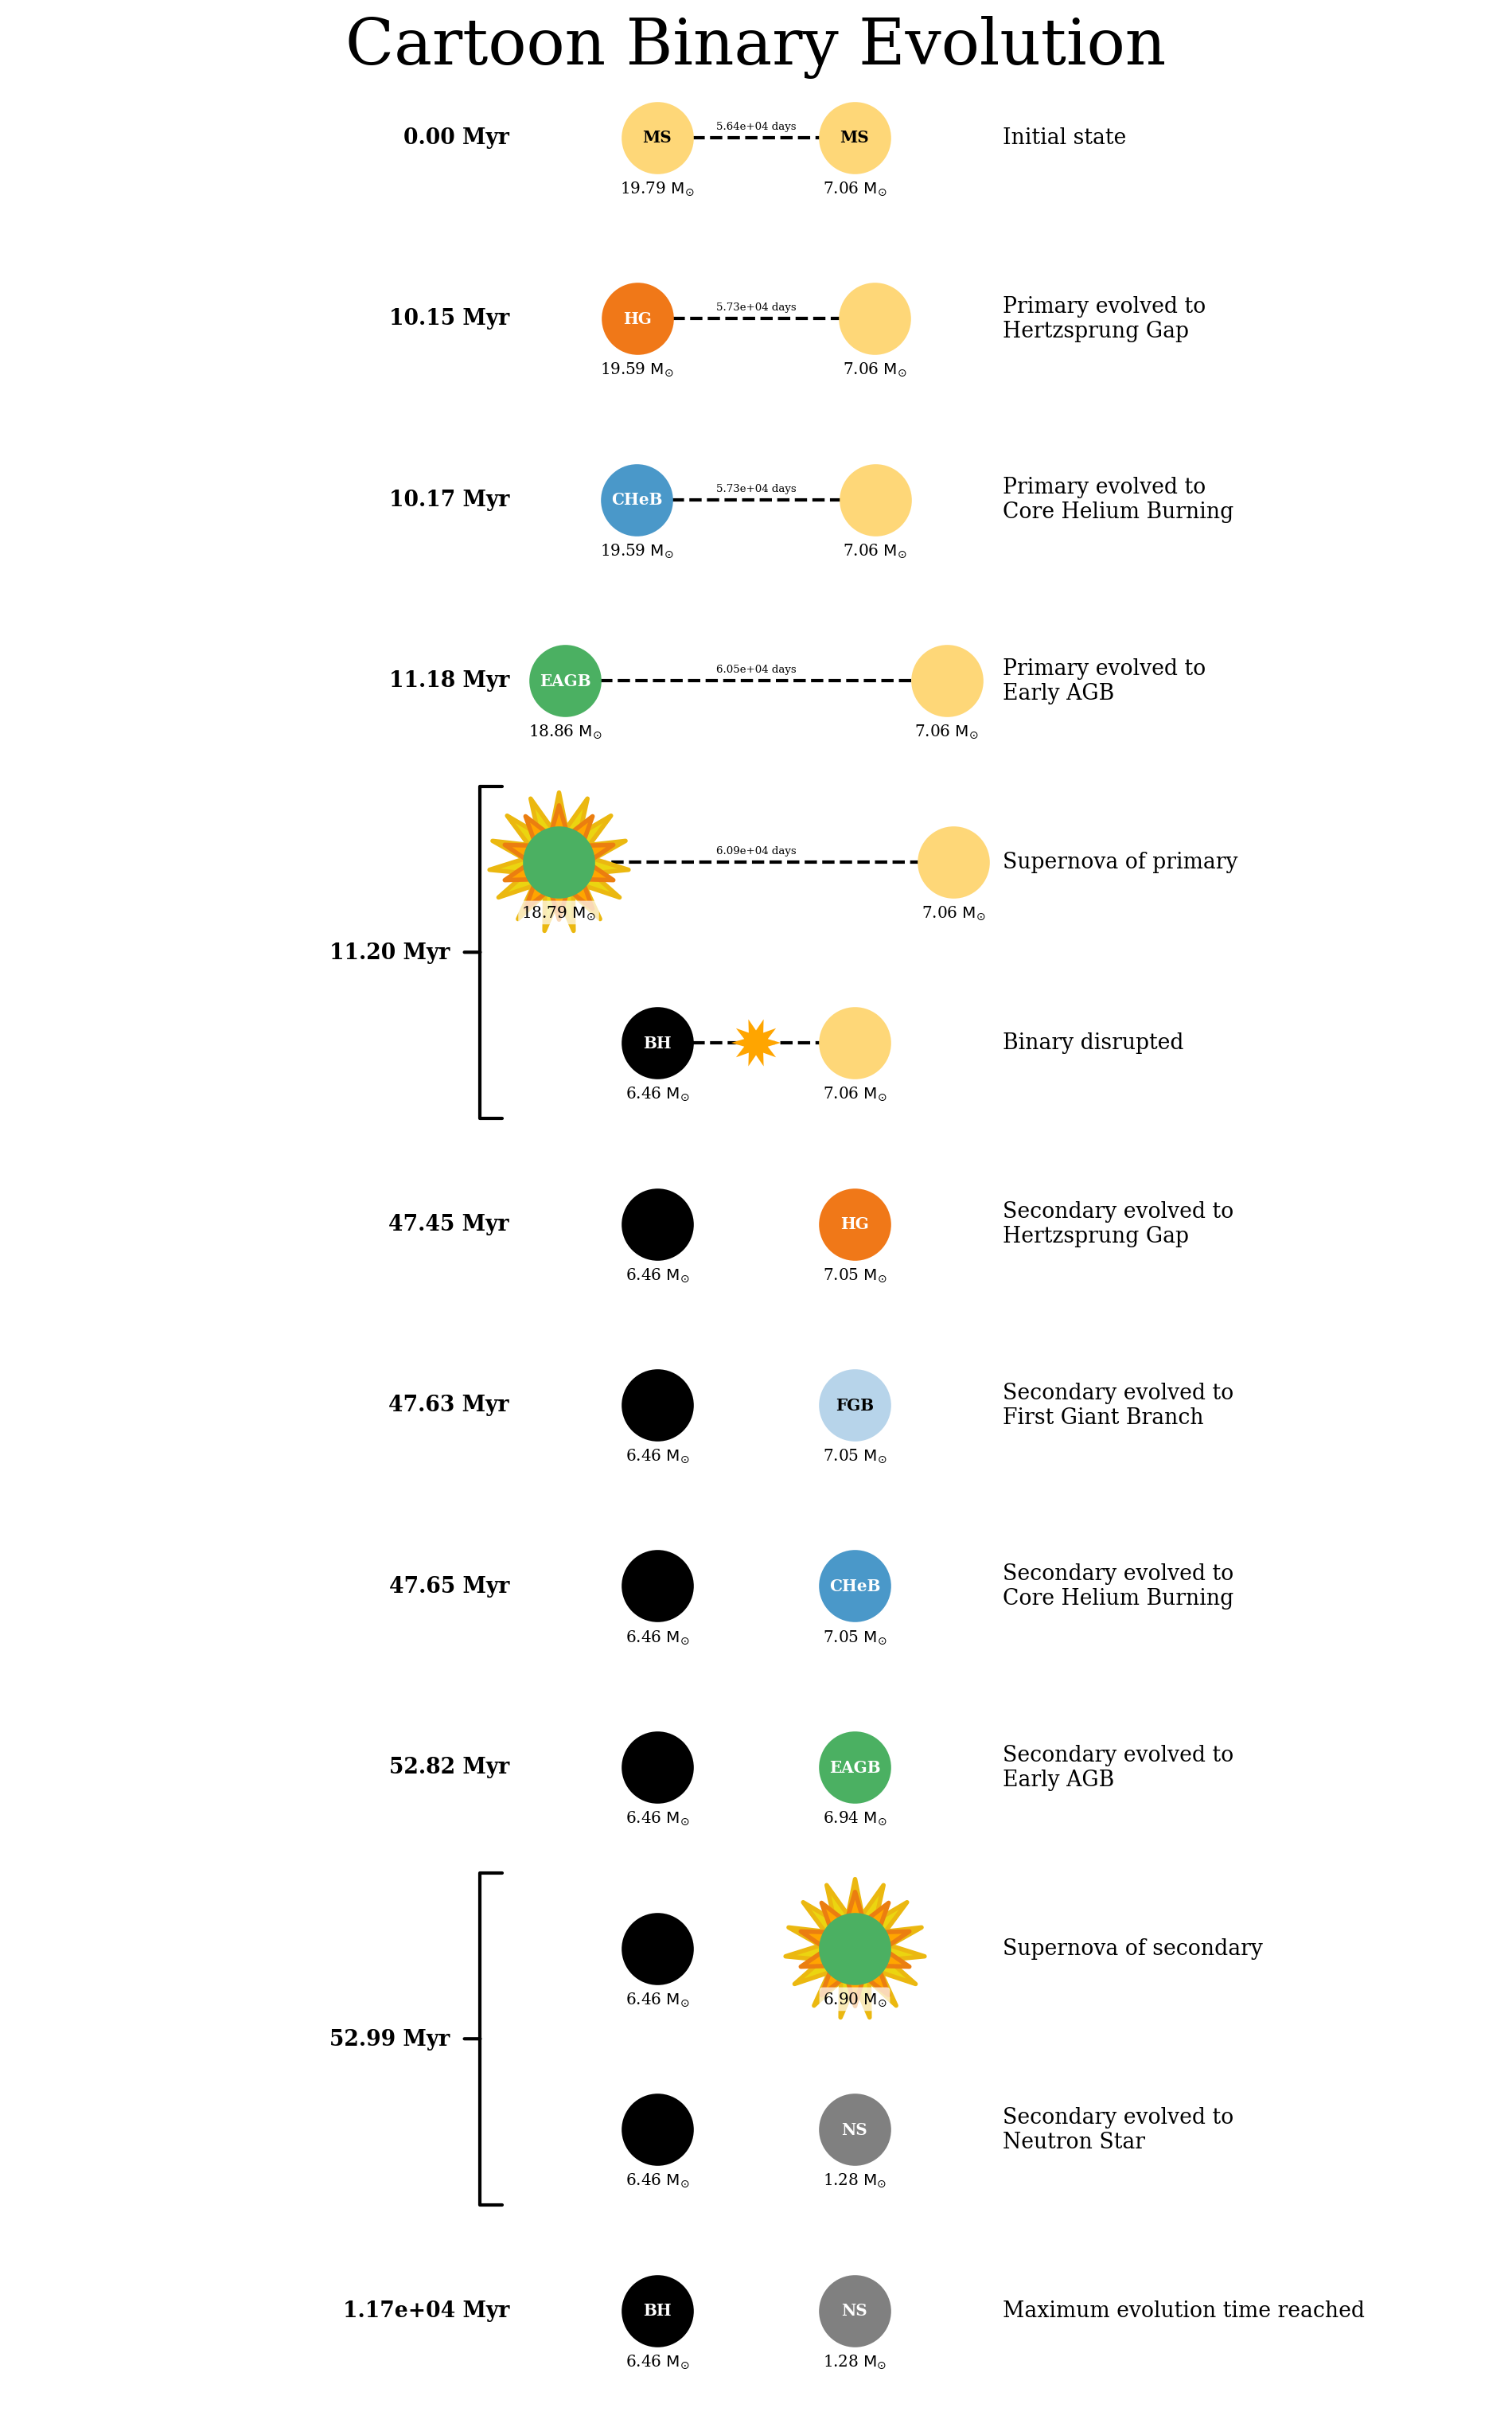

In [ ]:
fig, ax = p.plot_cartoon_binary(bin_num=most_massive)

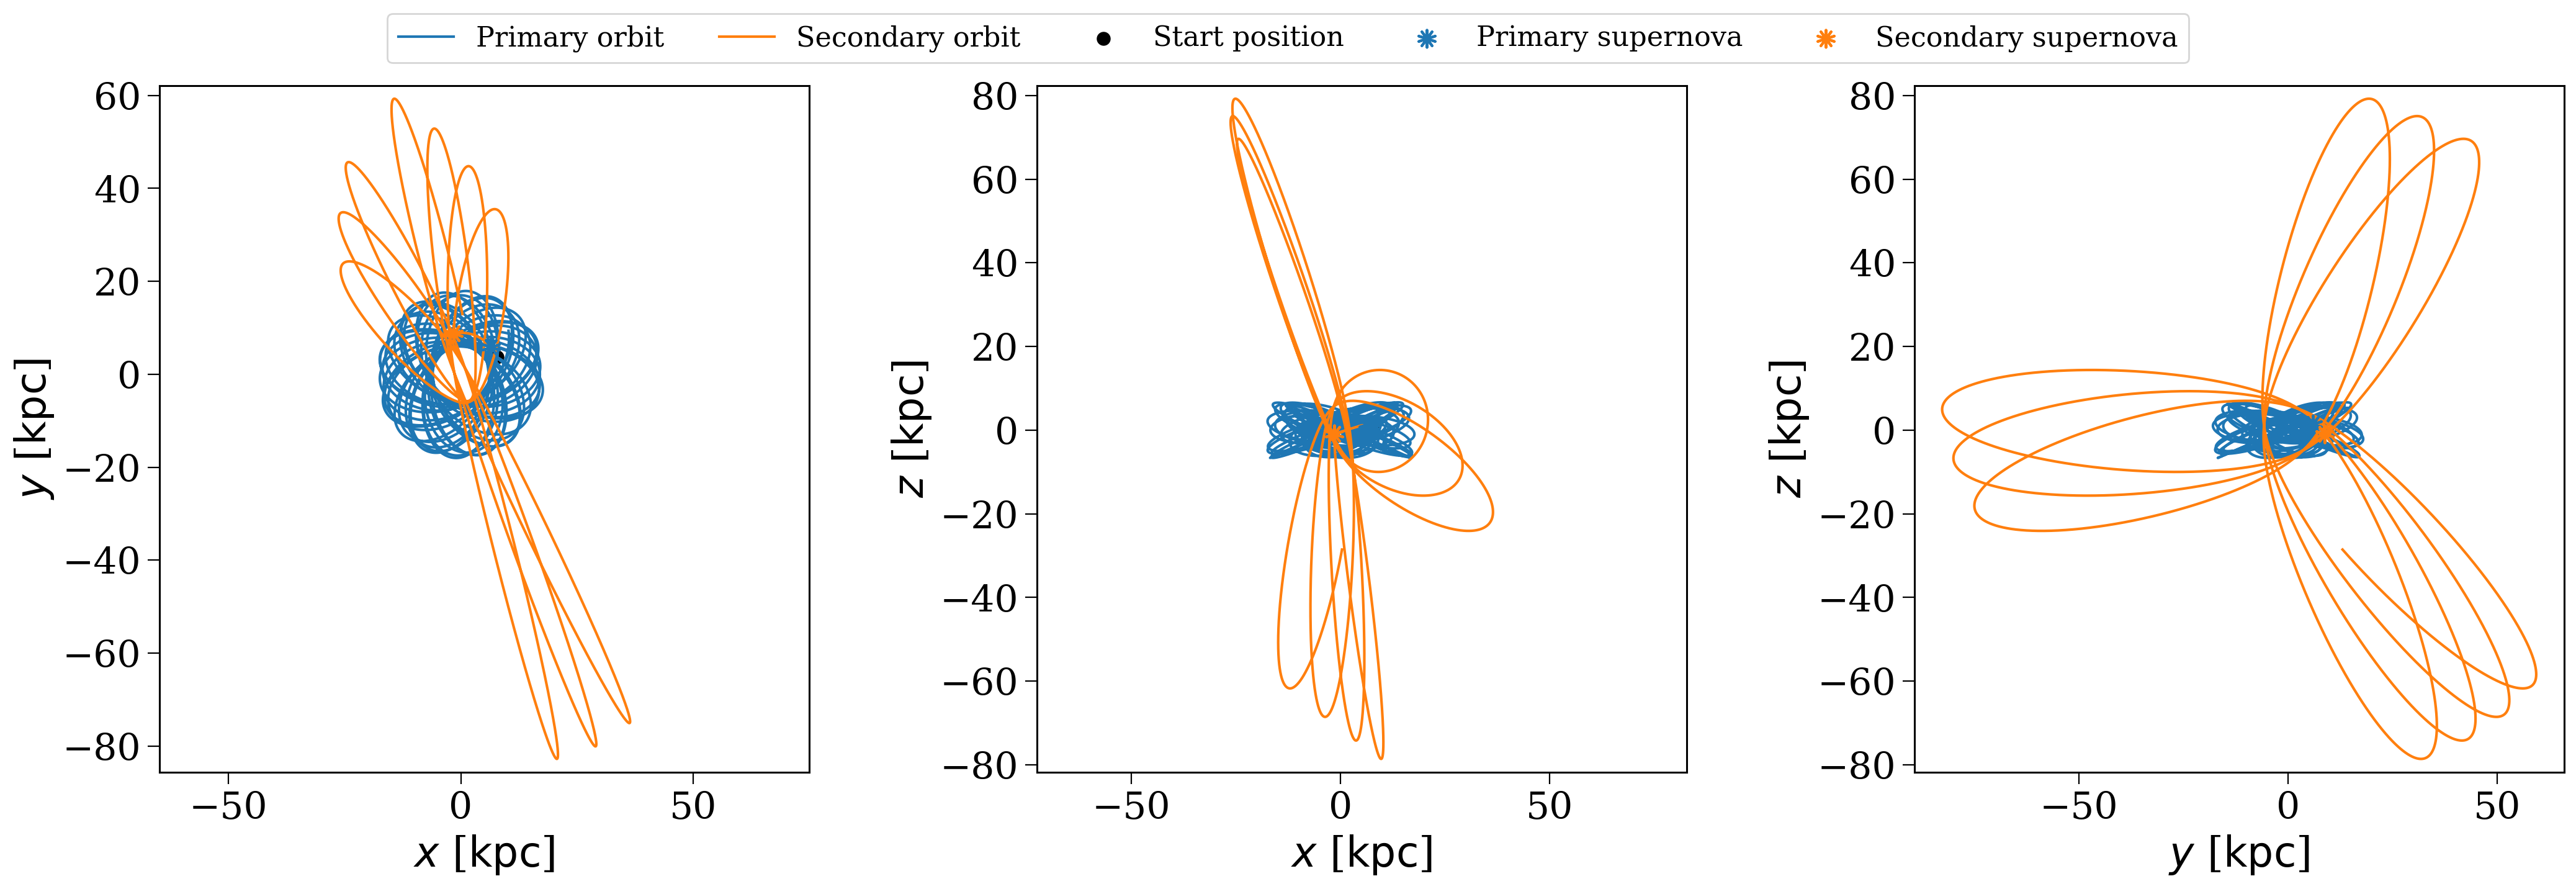

In [ ]:
fig, axes = p.plot_orbit(bin_num=most_massive)

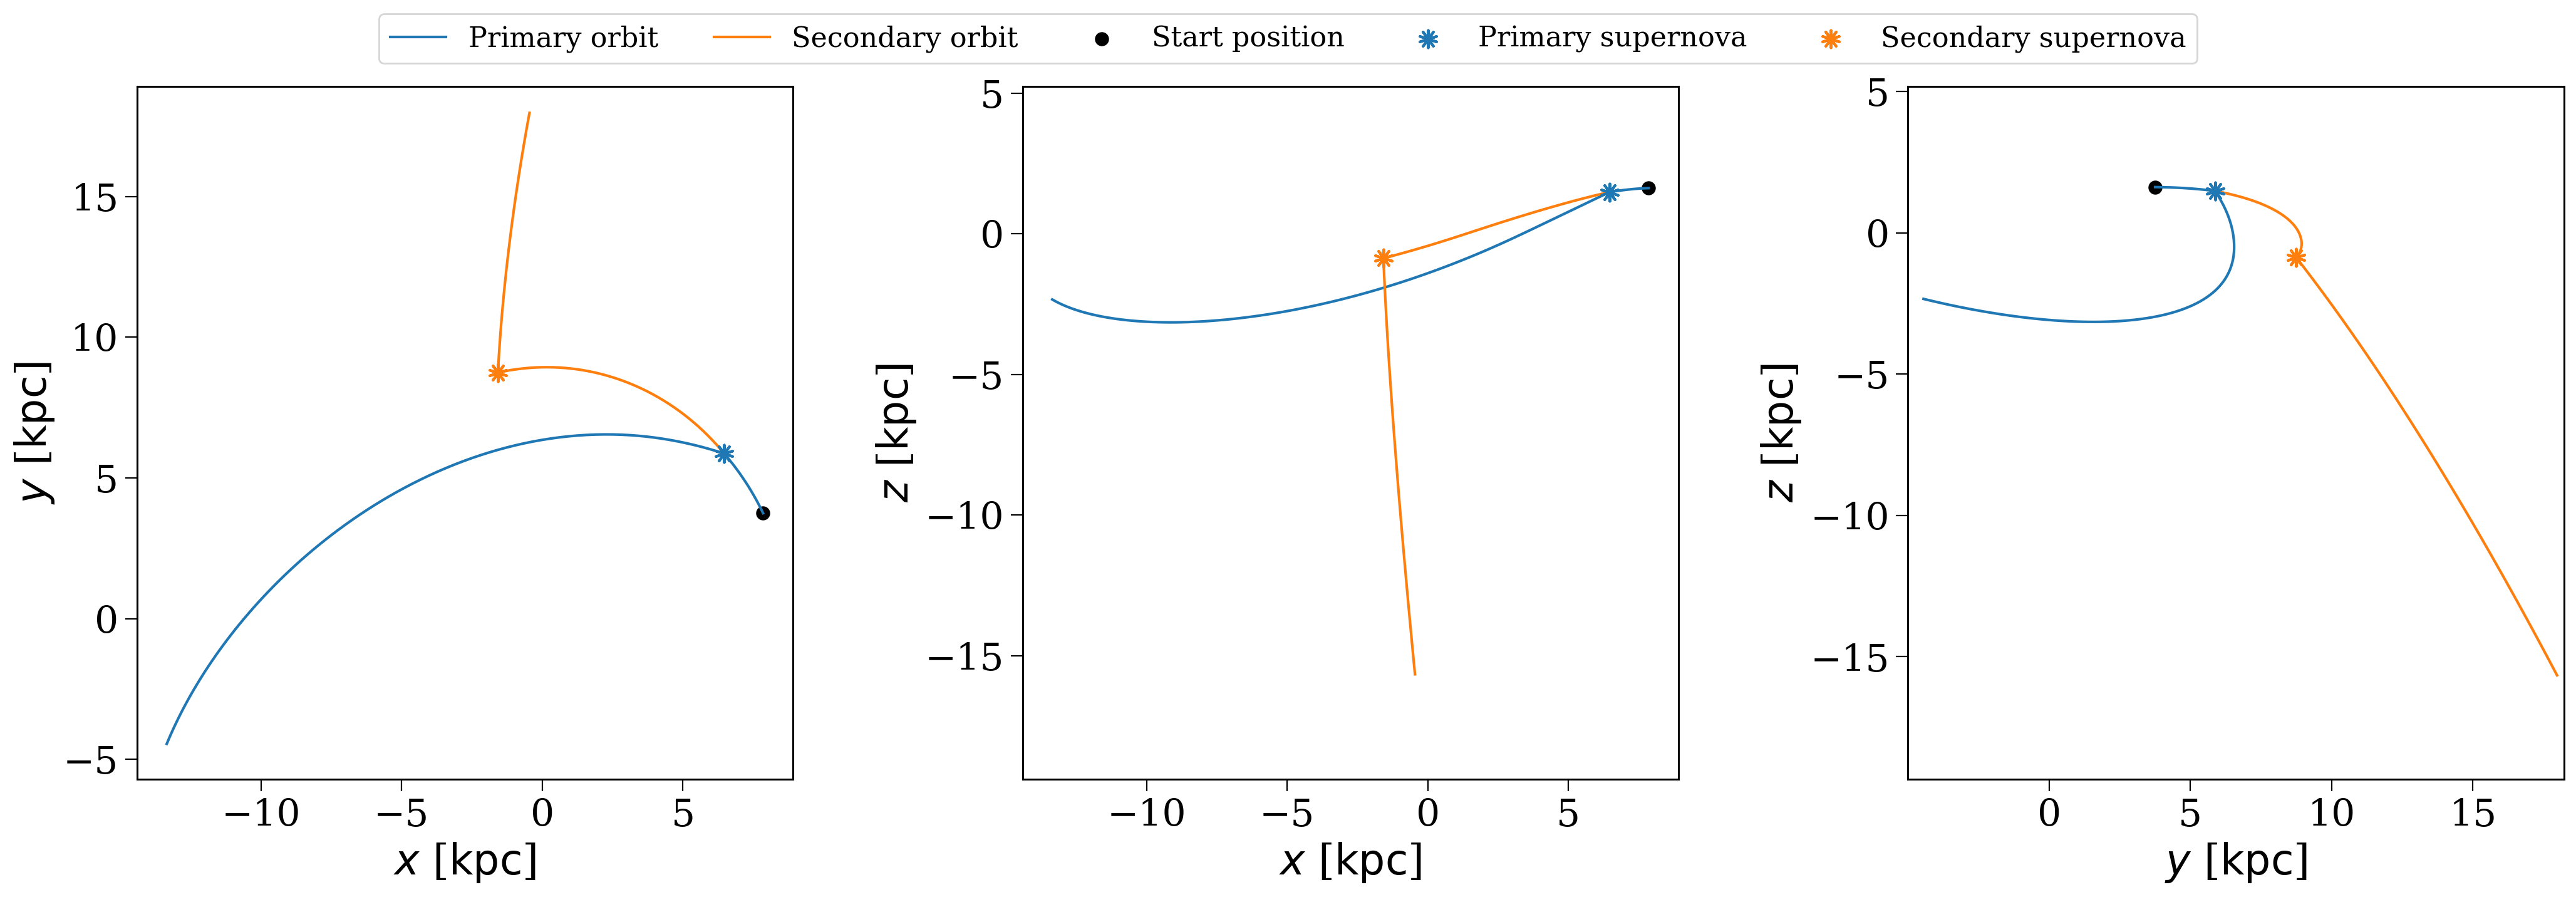

In [ ]:
fig, axes = p.plot_orbit(bin_num=most_massive, t_max=100 * u.Myr)

## Tasks

### 1.1: Your own population

To start, initialise a population with 1000 binaries, then sampling the binaries, evolve them, and integrate their orbits.

What are the initial properties of the first few binaries in the population?

In [18]:
# your code here

### 1.2: Distributions

Now let's make some plots. First, what does **the distribution of galactic birth times** look like for the binaries in the population?

In [19]:
# your code here

### 1.3: Your favourite binary

Now pick a binary of interest to you and inspect its evolution with a cartoon plot and look at its orbit through the galaxy.

Some inspiration for picking a binary:

- The most massive binary in the population
- A binary that ends by creating at least one neutron star
- A random binary!

In [20]:
# your code here

# Part 2: Selecting subpopulations of interest

In [27]:
p = cogsworth.pop.Population(
    n_binaries=10000,
    use_default_BSE_settings=True
)
p.create_population()

Run for 10000 binaries
Ended up with 13158 binaries with m1 > 0 solar masses
[6e-02s] Sample initial binaries
[3.1s] Evolve binaries (run COSMIC)


13207it [00:37, 347.68it/s]                            
cogsworth warning: 1 orbit(s) failed numerical integration, removing them. This can occur due to NaNs in stellar evolution or extreme orbits that Gala cannot handle. Information for these systems was saved to `./bad_orbits.h5`. This includes their initC, bpp, kick_info, and initial galaxy objects.


[51.3s] Get orbits (run gala)
Overall: 54.4s


### Inspect initial conditions

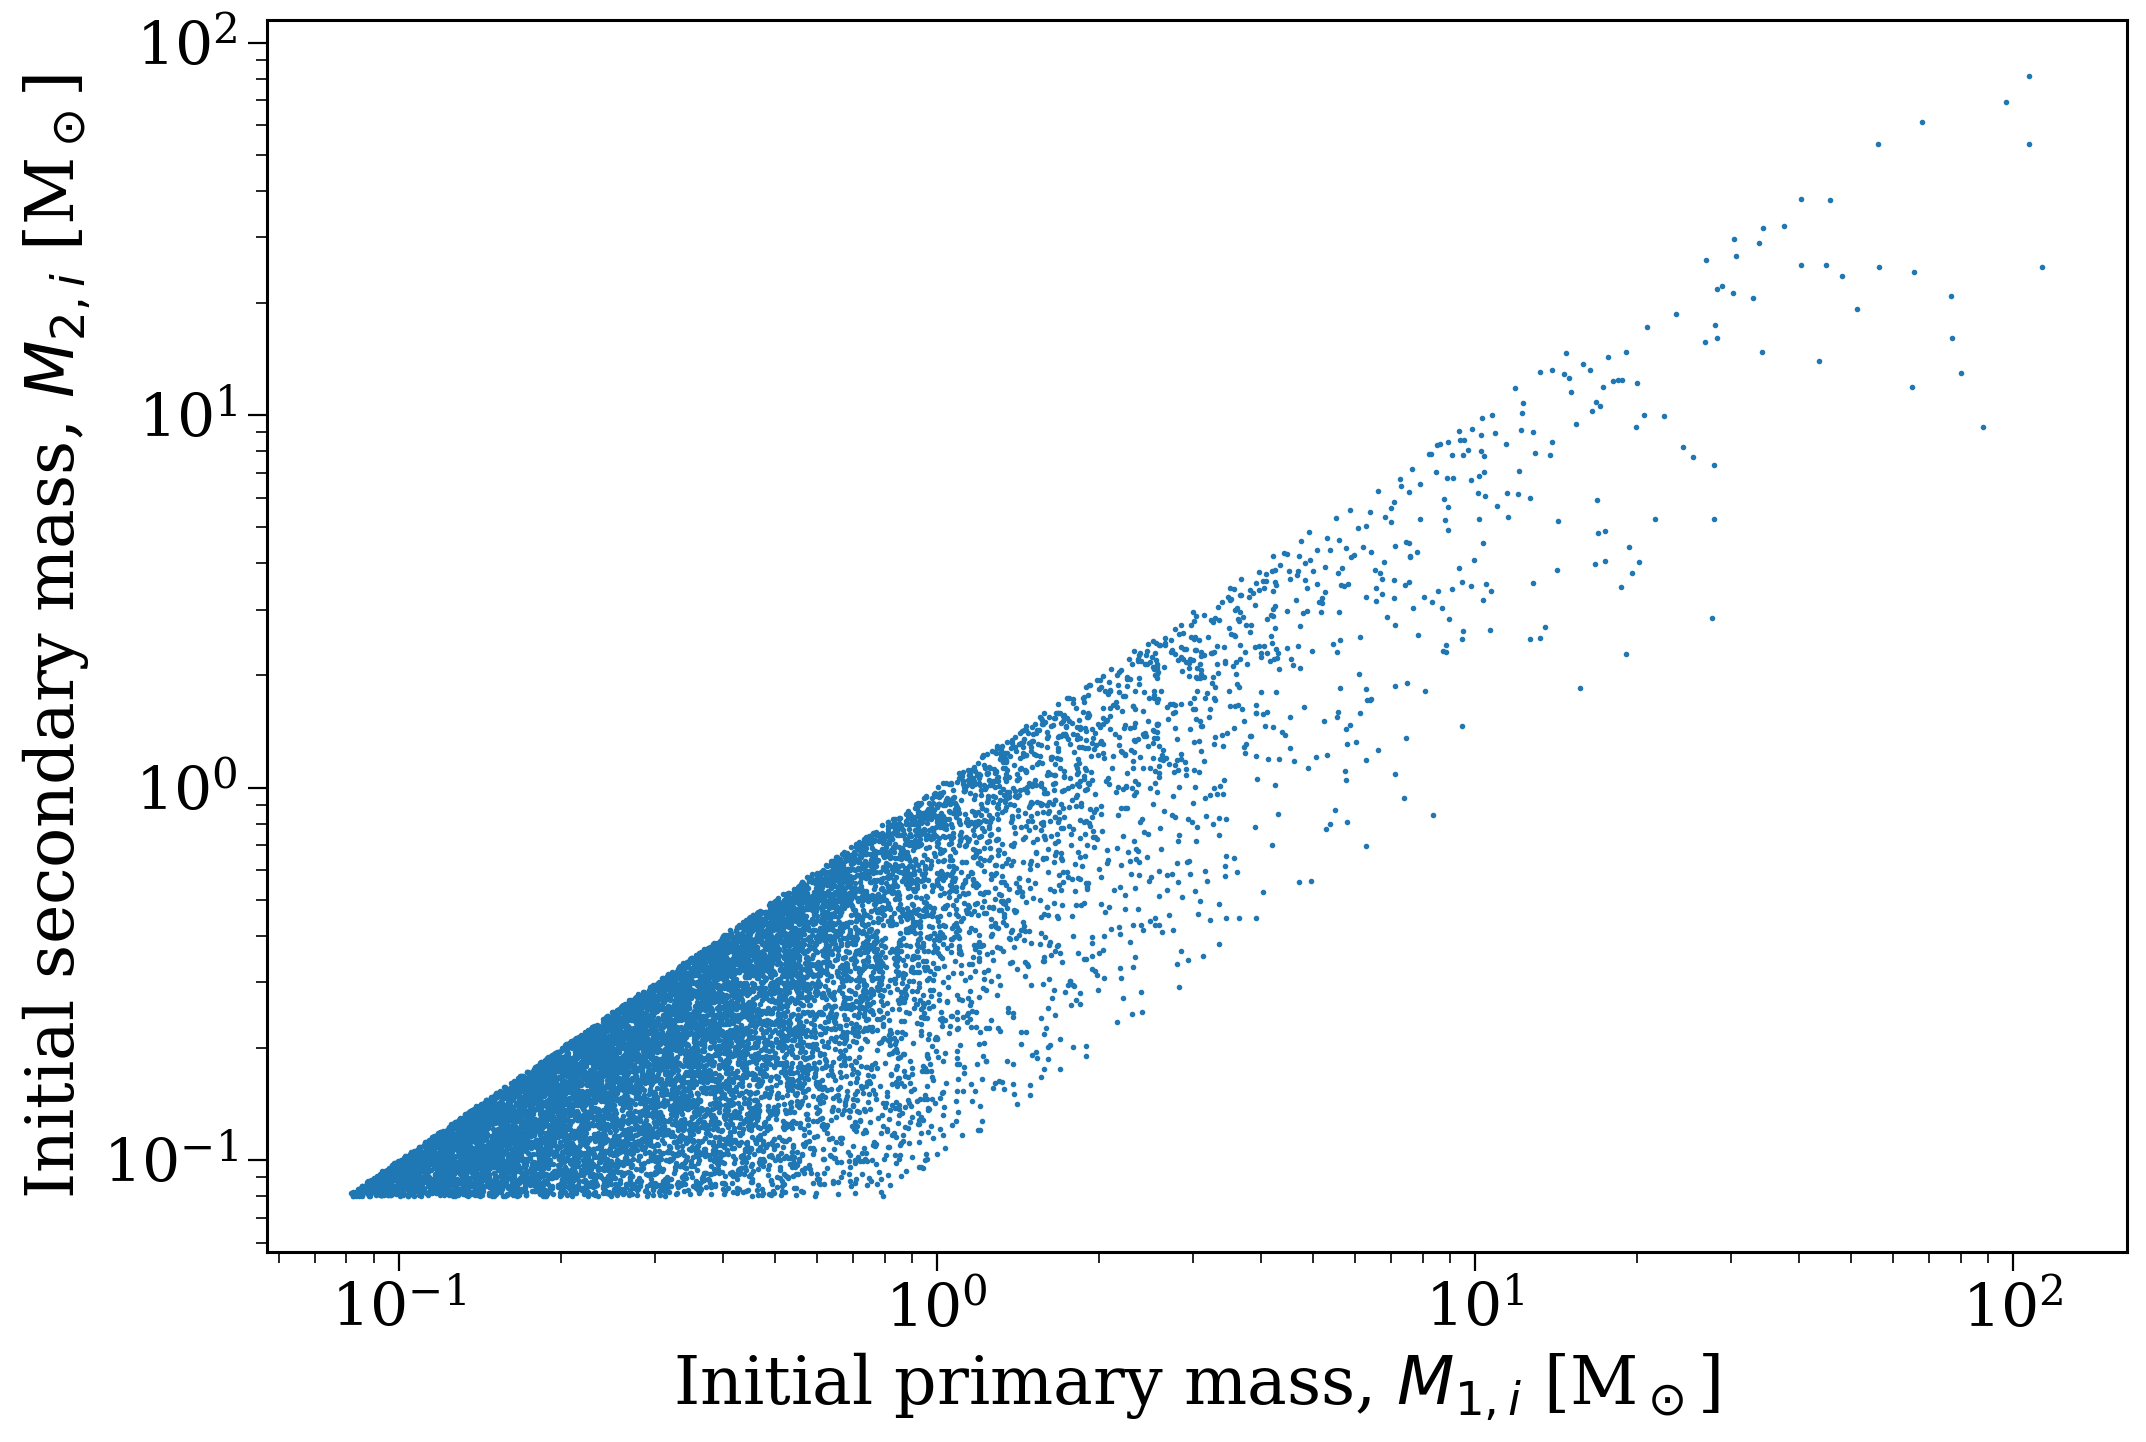

In [ ]:
fig, ax = plt.subplots()
ax.scatter(p.initial_binaries["mass_1"], p.initial_binaries["mass_2"],
           s=1, rasterized=True)

ax.set(
    xscale="log",
    yscale="log",
    xlabel="Initial primary mass, $M_{1, i}$ [M$_\odot$]",
    ylabel="Initial secondary mass, $M_{2, i}$ [M$_\odot$]",
)
plt.show()

### Mask based on initial conditions

In [29]:
mass_ratio_mask = (p.initial_binaries["mass_2"] / p.initial_binaries["mass_1"]) < 0.5

In [30]:
selected_bin_nums = p.bin_nums[mass_ratio_mask]
print(selected_bin_nums)

[    3     9    11 ... 13143 13149 13153]


In [31]:
# mask with bin_nums
new_pop = p[selected_bin_nums]

In [32]:
# mask with boolean array with same length as p.bin_nums
new_pop = p[mass_ratio_mask]

In [34]:
# how many binaries met this?
print(len(new_pop))

# range of mass ratios in this population
q = new_pop.initial_binaries["mass_2"] / new_pop.initial_binaries["mass_1"]
print(q.max())

3855
0.49992212923852236


### Mask based on final state

In [ ]:
primary_ends_as_wd = p.final_bpp["kstar_1"].isin([10, 11, 12])
secondary_ends_as_wd = p.final_bpp["kstar_2"].isin([10, 11, 12])
has_a_wd = primary_ends_as_wd | secondary_ends_as_wd

In [37]:
wd_pop = p[has_a_wd]
print(wd_pop)
print(wd_pop.final_bpp.head())

<Population - 1387 evolved systems - galactic_potential=MilkyWayPotential, sfh_model=Wagg2022>
           tphys    mass_1    mass_2  kstar_1  kstar_2           sep  \
1    8495.178892  1.011523  0.000000       11       15      0.000000   
9   11730.827593  0.366604  0.143666       10        0      1.010783   
44   7501.844382  0.630570  0.000000       11       15      0.000000   
46   2056.244092  0.718394  0.689890       11        0     72.039936   
57   9771.894759  0.930892  0.601463       11       11  47401.000562   

             porb       ecc        RRLO_1    RRLO_2  evol_type         aj_1  \
1        0.000000 -1.000000  1.000000e-04 -1.000000         10  8440.499529   
9        0.164877  0.000000  3.560630e-02  0.563657         10  5128.773973   
44       0.000000 -1.000000  1.000000e-04 -1.000000         10  2971.321403   
46      59.715479  0.000000  4.091435e-04  0.024040         10  1709.343204   
57  966214.848526  0.486983  8.705652e-07  0.000002         10  9686.588441  

## Tasks

### 2.1: Initial condition of mergers

#### 2.1.1: Initial scatter plot

First, make a plot of the initial orbital period vs the initial primary mass for all binaries in the population.

In [21]:
# your code here

#### 2.1.2: Mask mergers

The final separation is given by the ``sep`` column in the ``final_bpp`` table. You can access this table with ``p.final_bpp``.

In [22]:
# your code here

#### 2.1.3: Highlight mergers on plot

Now, update your plot to highlight the binaries that will eventually merge (however you like, outline the merger points, or just overplot them in a different color, etc).

In [23]:
# your code here

#### 2.1.4: Plot discussion

What trends do you notice in your plot? Which conditions seem to lead to mergers? Why?

### 2.2: [BONUS] Final positions of compact objects

#### 2.2.1: Final positions plot

First, make a plot of the final positions of the primary star from each binary in the population. Plot the Galactocentric radius ($R = \sqrt{x^2 + y^2}$) on the x-axis and the absolute Galactocentric height ($|z|$) on the y-axis. I recommend using a log-scale for both axes.

In [24]:
# your code here

#### 2.2.2: Mask compact objects

Now, create a mask that selects only binaries where either star ends as a neutron star or black hole (i.e. that receive a natal kick).

In [25]:
# your code here

#### 2.2.3: Highlight compact objects

Now, update your plot to highlight the binaries where the primary star ends as a neutron star or black hole.

In [26]:
# your code here

#### 2.2.4: Discuss trends

What trends do you notice in your plot? Do the compact objects seem to have different final positions than the rest of the population? Is that true for all of them? Why/why not?

In [27]:
# your words here

# Part 3: Finding timing and location of SNe

## Demo

In [45]:
p = cogsworth.pop.Population(
    n_binaries=10000,
    use_default_BSE_settings=True,
    final_kstar1=[13, 14],
    final_kstar2=[13, 14]
)
p.create_population()

Run for 10000 binaries
Ended up with 10040 binaries with m1 > 0 solar masses
[2e-01s] Sample initial binaries
[11.0s] Evolve binaries (run COSMIC)


11518it [00:20, 567.24it/s]                          
cogsworth warning: 23 orbit(s) failed numerical integration, removing them. This can occur due to NaNs in stellar evolution or extreme orbits that Gala cannot handle. Information for these systems was saved to `./bad_orbits_1.h5`. This includes their initC, bpp, kick_info, and initial galaxy objects.


[30.0s] Get orbits (run gala)
Overall: 41.2s


In [46]:
# find the times at which a common-envelope event starts
ce_mask = p.bpp["evol_type"] == 7

# mask the rows in the Pandas DataFrame
ce_rows = p.bpp[ce_mask]
ce_rows

tphys     mass_1     mass_2  kstar_1  kstar_2         sep  \
0       58.802922   5.861828   5.136281        3        1   62.077659   
1      135.533274   0.422964   8.495456        7        2  235.468665   
2       34.861296   7.980870   5.417417        2        1   63.373542   
4       20.091589   9.737152  12.434234        4        1  522.868176   
5      187.147739   0.475513   7.420991        7        2  145.867561   
...           ...        ...        ...      ...      ...         ...   
10033   22.236810  10.396485  10.247099        3        1  317.068441   
10035   49.288021   6.726571   5.272614        2        1   21.655023   
10036   28.319512   8.853200   7.725660        3        1  204.829660   
10037   24.831806   5.355049  15.395763        2        1   24.181836   
10039  103.689248   4.818332   4.468512        3        1  274.317783   

             porb  ecc    RRLO_1    RRLO_2  evol_type        aj_1        aj_2  \
0       17.092916  0.0  2.369133  0.131986          7   59.487748   40.109321   
1      140.225784  0.0  0.002331  1.001010          7   14.827857   32.205853   
2       15.973846  0.0  2.298745  0.150333          7   35.893604   30.163103   
4      294.282237  0.0  2.773609  0.024310          7   20.166822   11.209297   
5       72.659569  0.0  0.004181  1.001008          7   22.529508   44.417474   
...           ...  ...       ...       ...        ...         ...         ...   
10033  144.015465  0.0  1.698412  0.086007          7   22.930929   22.666970   
10035    3.371586  0.0  2.115697  0.427604          7   50.848424   41.646516   
10036   83.441882  0.0  2.133631  0.073510          7   29.219477   27.113093   
10037    3.025440  0.0  2.039585  0.857150          7   73.350490   10.686633   
10039  172.790175  0.0  1.000991  0.035822          7  103.781971  103.713991   

            tms_1       tms_2  massc_he_layer_1  massc_he_layer_2  \
0       59.271603   94.874976          1.203827          0.000000   
1      275.404630   32.117056          0.000000          1.761011   
2       35.818108   86.336032          1.666536          0.000000   
4       18.638205   18.728333          3.955664          0.000000   
5      175.120036   44.274678          0.000000          1.466468   
...           ...         ...               ...               ...   
10033   22.873362   23.498208          2.316852          0.000000   
10035   50.784844   91.098519          1.331663          0.000000   
10036   29.139690   39.240505          1.891446          0.000000   
10037   73.254629   12.622390          1.055296          0.000000   
10039  103.158777  121.398310          0.823708          0.000000   

       massc_co_layer_1  massc_co_layer_2       rad_1       rad_2    mass0_1  \
0                   0.0               0.0   57.417794    3.011384   6.408235   
1                   0.0               0.0    0.092291  148.504136   0.422964   
2                   0.0               0.0   60.192932    3.296575   8.153738   
4                   0.0               0.0  519.117236    5.066932  12.425629   
5                   0.0               0.0    0.110600   89.371761   0.475513   
...                 ...               ...         ...         ...        ...   
10033               0.0               0.0  204.728598   10.299092  10.405148   
10035               0.0               0.0   18.351976    3.316407   6.906756   
10036               0.0               0.0  170.778072    5.528749   8.954109   
10037               0.0               0.0   14.404882    9.777240   5.813983   
10039               0.0               0.0  105.844049    3.659597   4.819028   

         mass0_2         lum_1         lum_2        teff_1        teff_2  \
0       5.136281   2661.371754    817.630033   5495.696543  17865.936418   
1       8.495456      8.500435   5332.682191  32587.388692   4065.713406   
2       5.417417   5858.905632    856.354352   6538.091391  17274.342115   
4      12.434234  55167.568202  17332.827540   3899.939292  29553.87

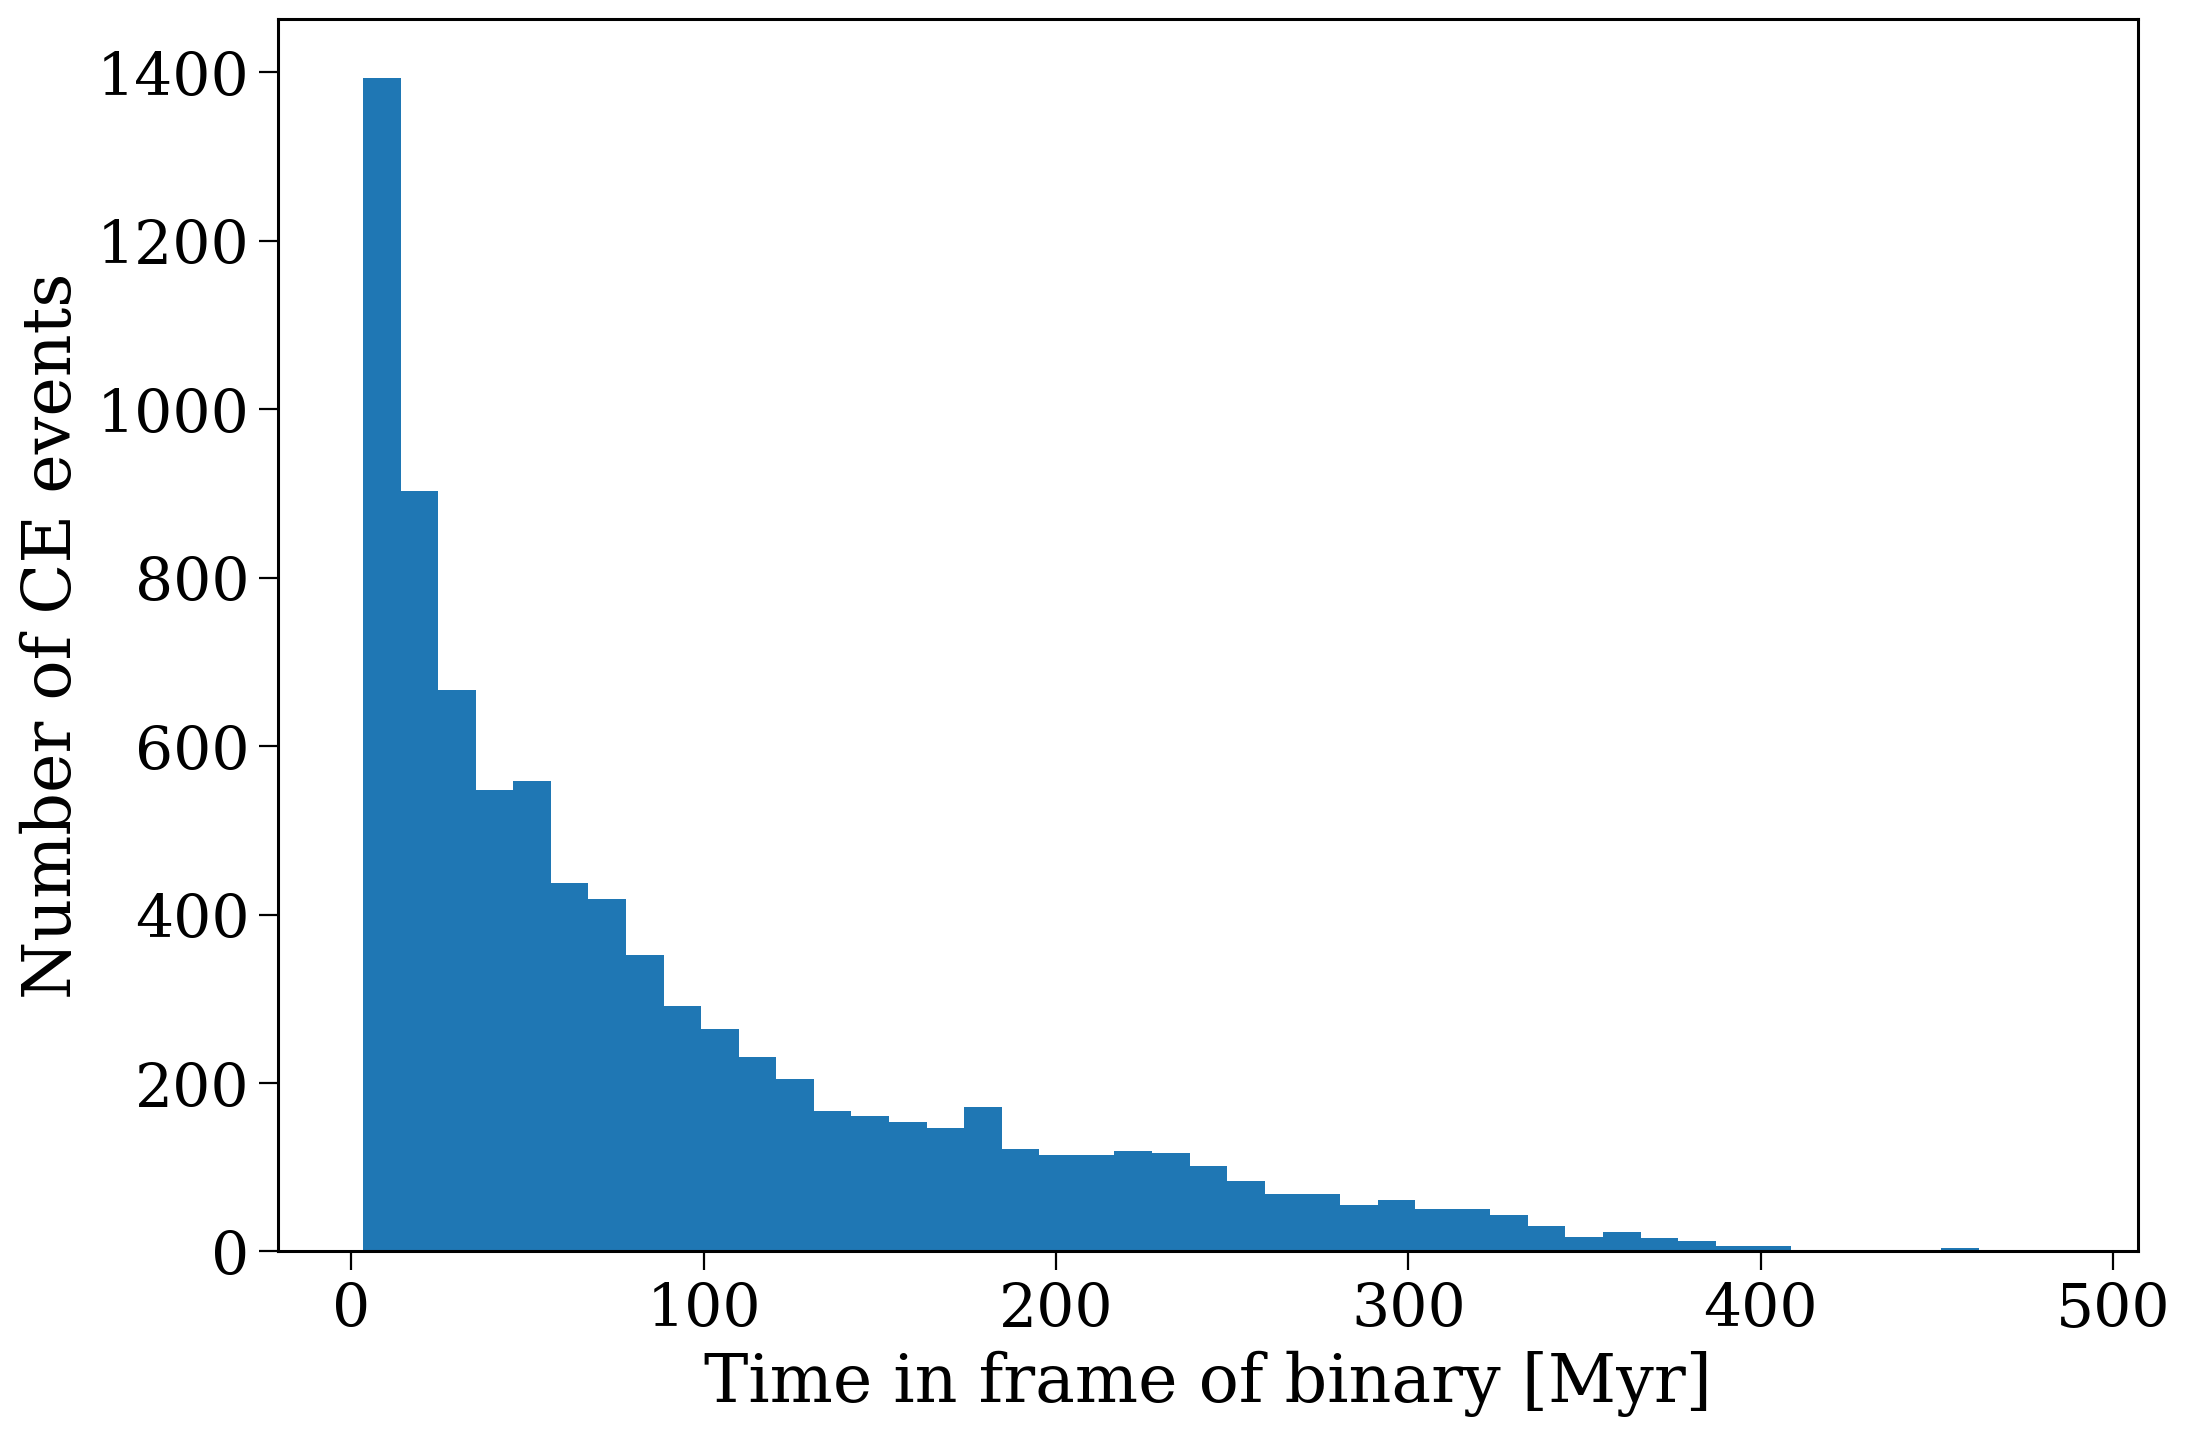

In [ ]:
fig, ax = plt.subplots()
ax.hist(ce_rows["tphys"], bins="auto")
ax.set(
    xlabel="Time in frame of binary [Myr]",
    ylabel="Number of CE events",
)
plt.show()

In [48]:
# get the bin_nums of the common-envelope events
ce_bin_nums = ce_rows["bin_num"]

ce_indices = np.searchsorted(p.bin_nums, ce_bin_nums)

# use these indices to get tau
ce_tau = p.initial_galaxy.tau[ce_indices]

# compute the galactic times
ce_t_gal = p.max_ev_time - ce_tau + ce_rows["tphys"].values * u.Myr

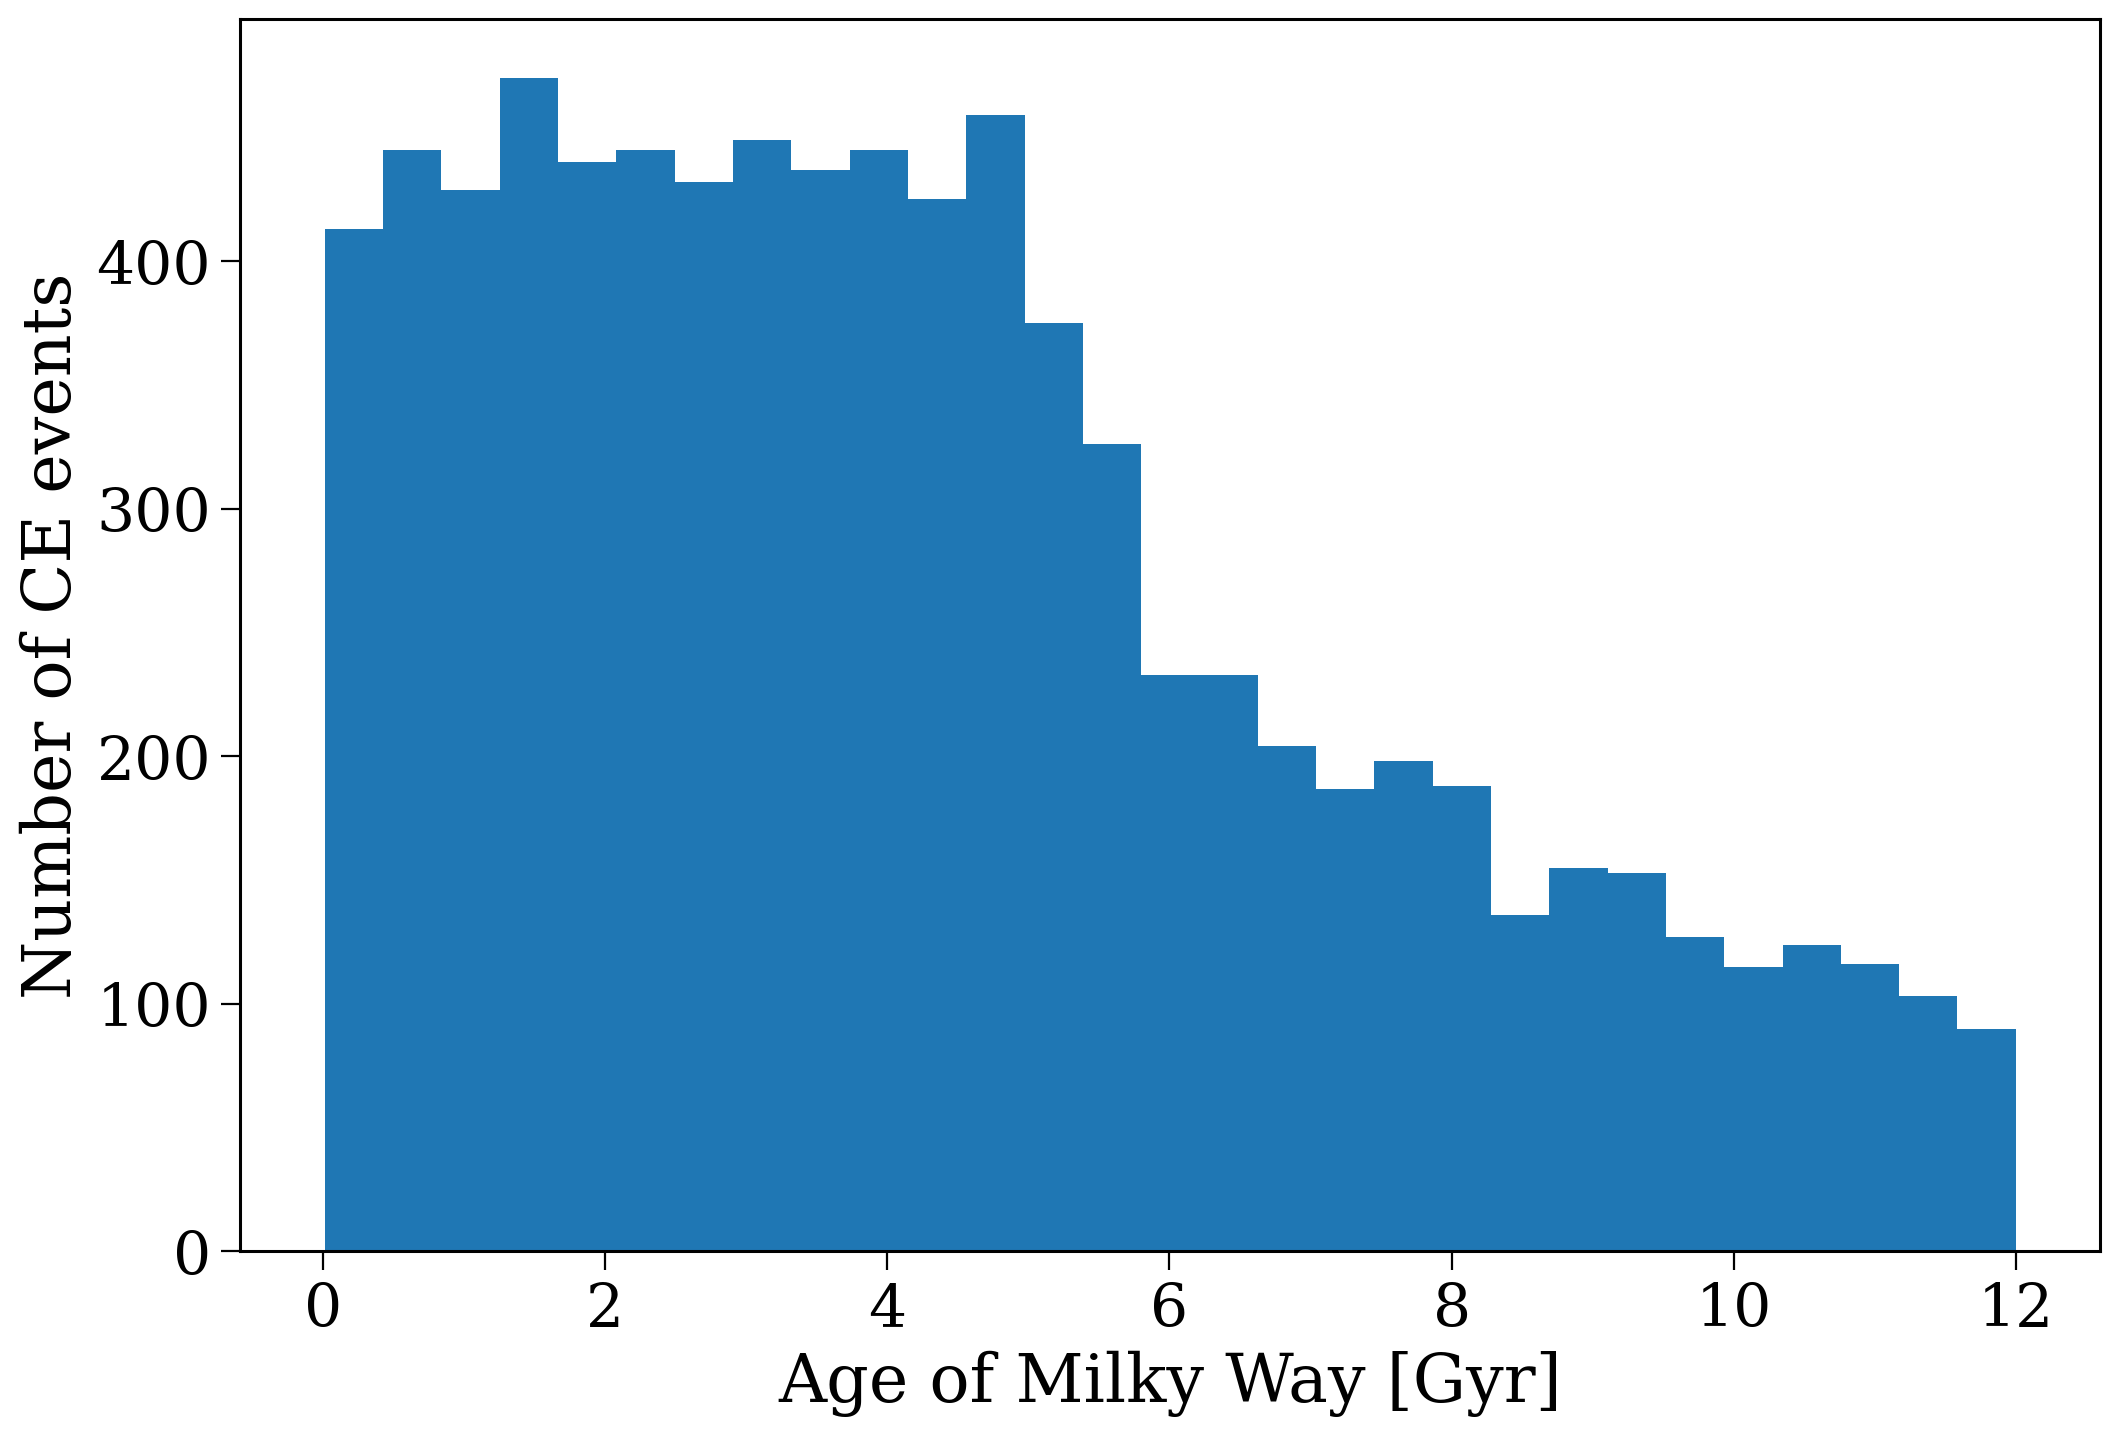

In [ ]:
fig, ax = plt.subplots()
ax.hist(ce_t_gal.to(u.Gyr).value, bins="auto")
ax.set(
    xlabel="Age of Milky Way [Gyr]",
    ylabel="Number of CE events",
)
plt.show()

In [50]:
# let's take the first orbit
orbit_example = p.orbits[0]

# it stores the time and position at each timestep
print(orbit_example.t)
print(orbit_example.pos.xyz)

[ 4724.7688886  4725.7688886  4726.7688886 ... 11997.7688886 11998.7688886
 11999.7688886] Myr
[[-5.94205345 -6.12803714 -6.30936834 ...  4.98849592  4.81768314
   4.64474996]
 [ 6.07108892  5.8800647   5.68457627 ...  9.69735348  9.81921136
   9.93674775]
 [-0.06543798 -0.06354931 -0.06126102 ... -0.08103202 -0.07982149
  -0.07838792]] kpc


In [51]:
ce_positions = np.zeros((len(ce_rows), 3)) * u.kpc

# go through each of the common-envelope events
for i in range(len(ce_indices)):
    # find the corresponding orbit
    ce_orbit = p.orbits[ce_indices[i]]

    # compute the last timestep where orbit.t is less than ce_t_gal[i]
    closest_time_index = np.where(ce_orbit.t < ce_t_gal[i])[0][-1]

    # get the position of the binary at this time
    ce_positions[i] = ce_orbit.pos.xyz[:, closest_time_index]

In [81]:
def plot_positions(positions, times, fig=None, axes=None,
                   XMAX=20, ZMAX=5, show=True, cbar=True):
    if fig is None or axes is None:
        fig, axes = plt.subplots(2, 1, figsize=(8, 9), gridspec_kw={"height_ratios": [1, 4]})
    axes[0].scatter(positions[:, 0], positions[:, 2], c=times.to(u.Gyr).value,
                    cmap="magma", s=5, rasterized=True)
    axes[0].set(
        xlim=(-XMAX, XMAX),
        ylim=(-ZMAX, ZMAX),
        ylabel="$z$ [kpc]",
        aspect="equal",
    )
    axes[1].scatter(positions[:, 0], positions[:, 1], c=times.to(u.Gyr).value,
                    cmap="magma", s=5, rasterized=True)
    axes[1].set(
        xlim=(-XMAX, XMAX),
        ylim=(-XMAX, XMAX),
        xlabel="Galactocentric $x$ [kpc]",
        ylabel="Galactocentric $y$ [kpc]",
        aspect="equal",
    )

    if cbar:
        fig.colorbar(axes[0].collections[0], ax=axes, label="Age of Milky Way [Gyr]")
    if show:
        plt.show()
    return fig, axes

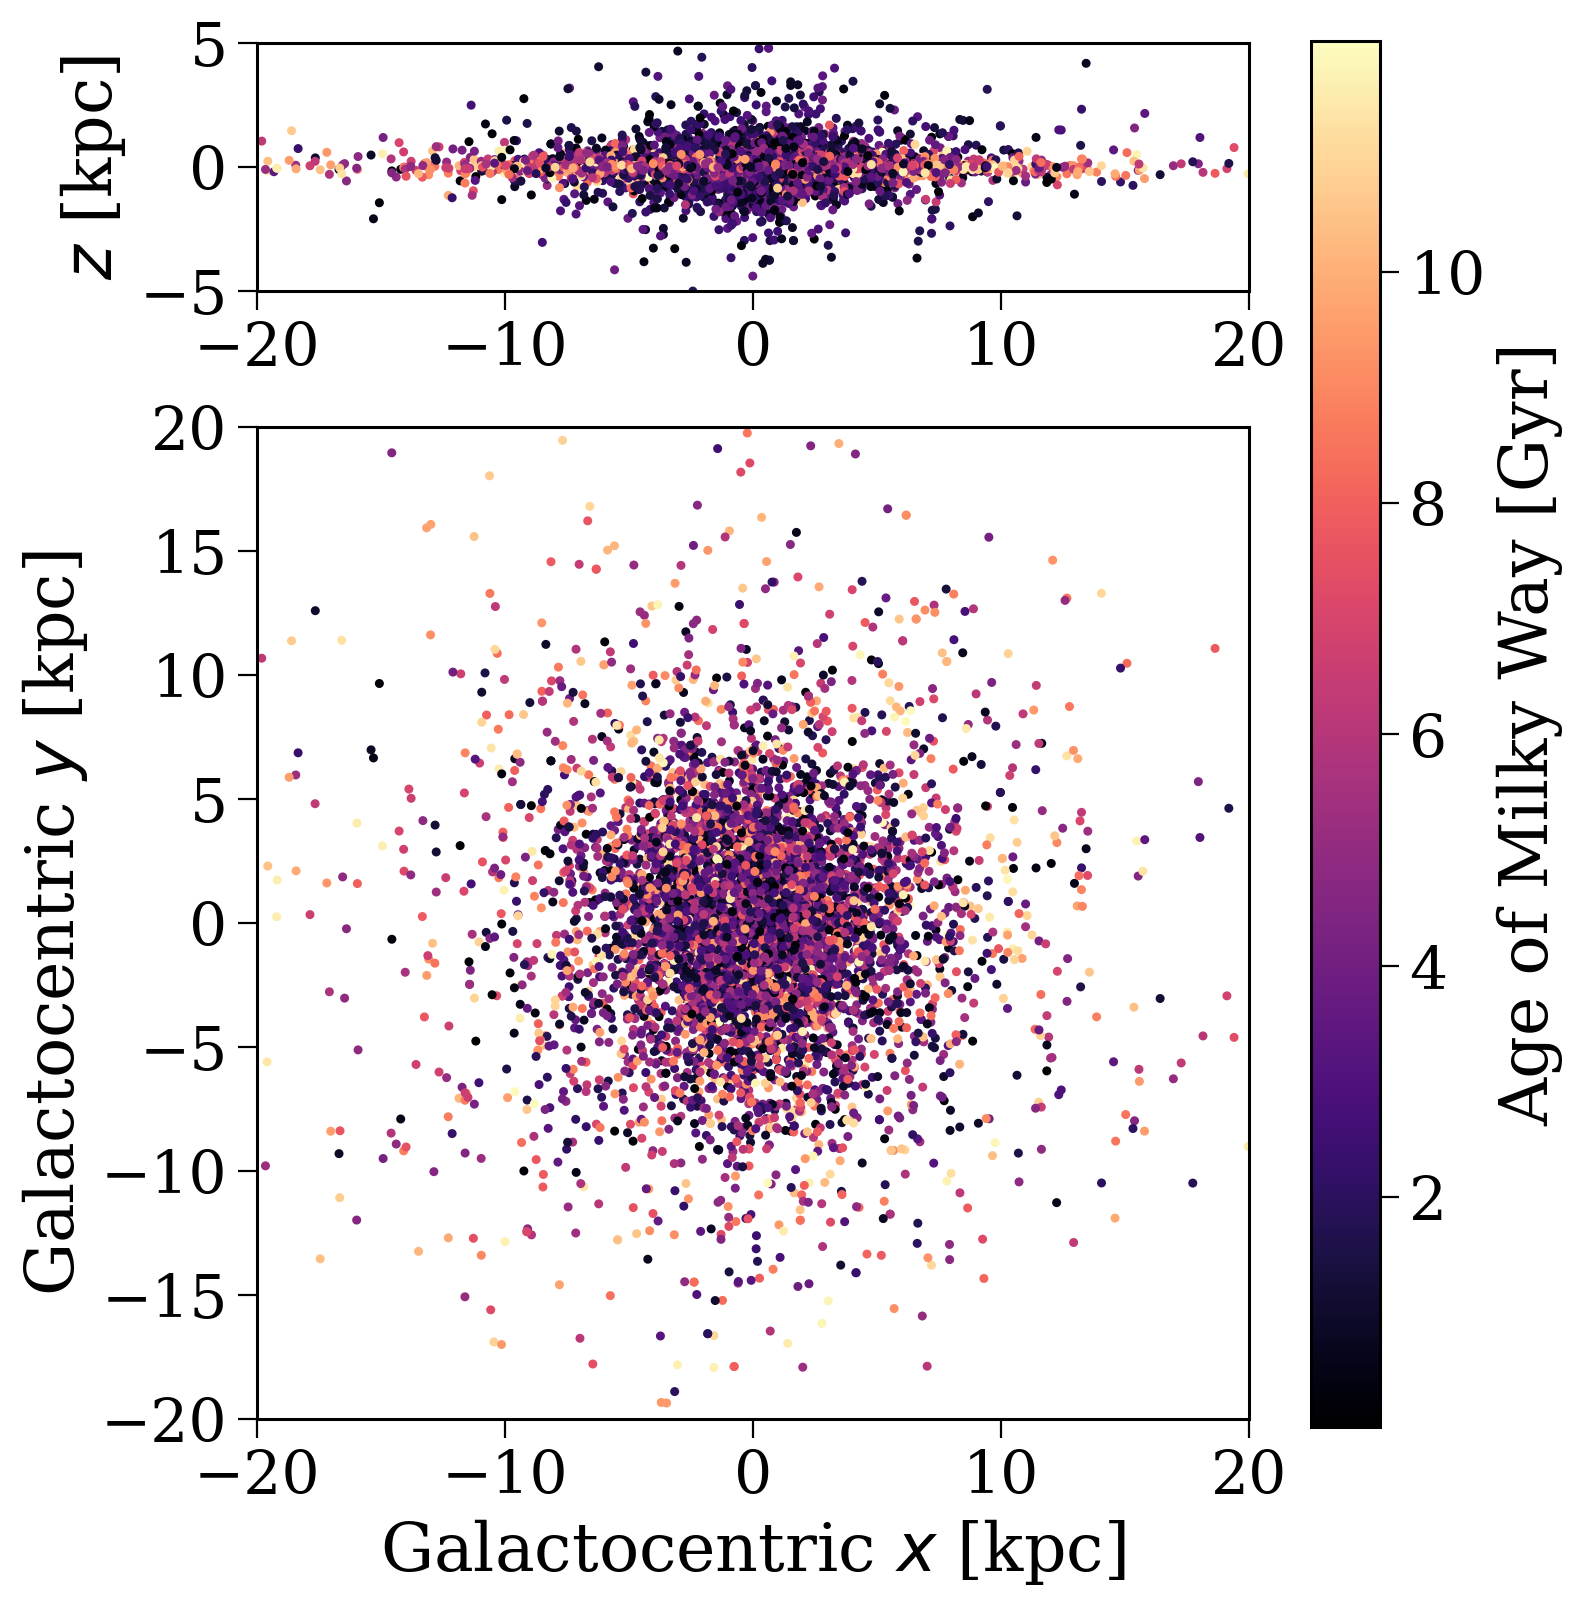

In [ ]:
plot_positions(ce_positions, ce_t_gal)

## Tasks

### 3.1: Find the supernovae

Create a population like the one above (~10000 binaries, that preferentially samples higher mass binaries). Write a mask for the ``bpp`` table that selects only the rows corresponding to supernova events. Note that supernovae are labelled as either ``evol_type == 15`` (primary star supernova) or ``evol_type == 16`` (secondary star supernova).

It will be useful to know whether a supernova corresponds to the primary or secondary star, so create two separate masks for these.

In [28]:
# your code here

### 3.2: Supernovae time histogram (binary frame)

Now make a histogram that shows the distribution of supernova times in the frame of the binary. Ensure to create separate histograms for primary and secondary supernovae.

Use the same bins for both histograms and set ``density=True`` in both calls to ``plt.hist`` so that you can compare the shapes of the distributions and not just the number of supernovae.

What do you notice about the timing of primary vs. secondary supernovae? Are they the same? Why/why not?

In [29]:
# your code here

### Task 3.3: Supernovae time histogram (galaxy frame)

Now compute the timing of these supernovae in the galactic frame and make a histogram of these galactic times. Do primary and secondary supernovae have different distributions on galactic timescales? Why/why not?

In [30]:
# your code here

### Task 3.4: Supernova positions

Last but not least, let's find the positions of these supernovae in the galaxy!

Follow the same method as above to find the positions of these supernovae in the galaxy and make a plot of these positions like the one above (both types together, :math:`x` and :math:`y` limits of 30 kpc and :math:`z` limits of 7.5 kpc should work well for this).

In [31]:
# your code here

# Part 4: Vary your assumptions

## Demo

In [84]:
template = cogsworth.pop.Population(
    n_binaries=10000,
    use_default_BSE_settings=True,
    final_kstar1=[13, 14],
    final_kstar2=[13, 14],
)
template.sample_initial_binaries()

In [85]:
fiducial = template.copy()
fiducial.perform_stellar_evolution()
fiducial.perform_galactic_evolution()

11553it [00:21, 544.88it/s]                            
cogsworth warning: 32 orbit(s) failed numerical integration, removing them. This can occur due to NaNs in stellar evolution or extreme orbits that Gala cannot handle. Information for these systems was saved to `./bad_orbits_2.h5`. This includes their initC, bpp, kick_info, and initial galaxy objects.


### Initial population distributions

In [86]:
diff_porb = template.copy()
diff_porb.sampling_params["porb_model"] = {'min': 0.15, 'max': 5.5, 'slope': 0.5}
diff_porb.create_population()

Run for 10035 binaries
Ended up with 10524 binaries with m1 > 0 solar masses
[2e-01s] Sample initial binaries
[14.5s] Evolve binaries (run COSMIC)


13609it [00:35, 378.07it/s]                           
cogsworth warning: 53 orbit(s) failed numerical integration, removing them. This can occur due to NaNs in stellar evolution or extreme orbits that Gala cannot handle. Information for these systems was saved to `./bad_orbits_3.h5`. This includes their initC, bpp, kick_info, and initial galaxy objects.


[55.4s] Get orbits (run gala)
Overall: 70.1s


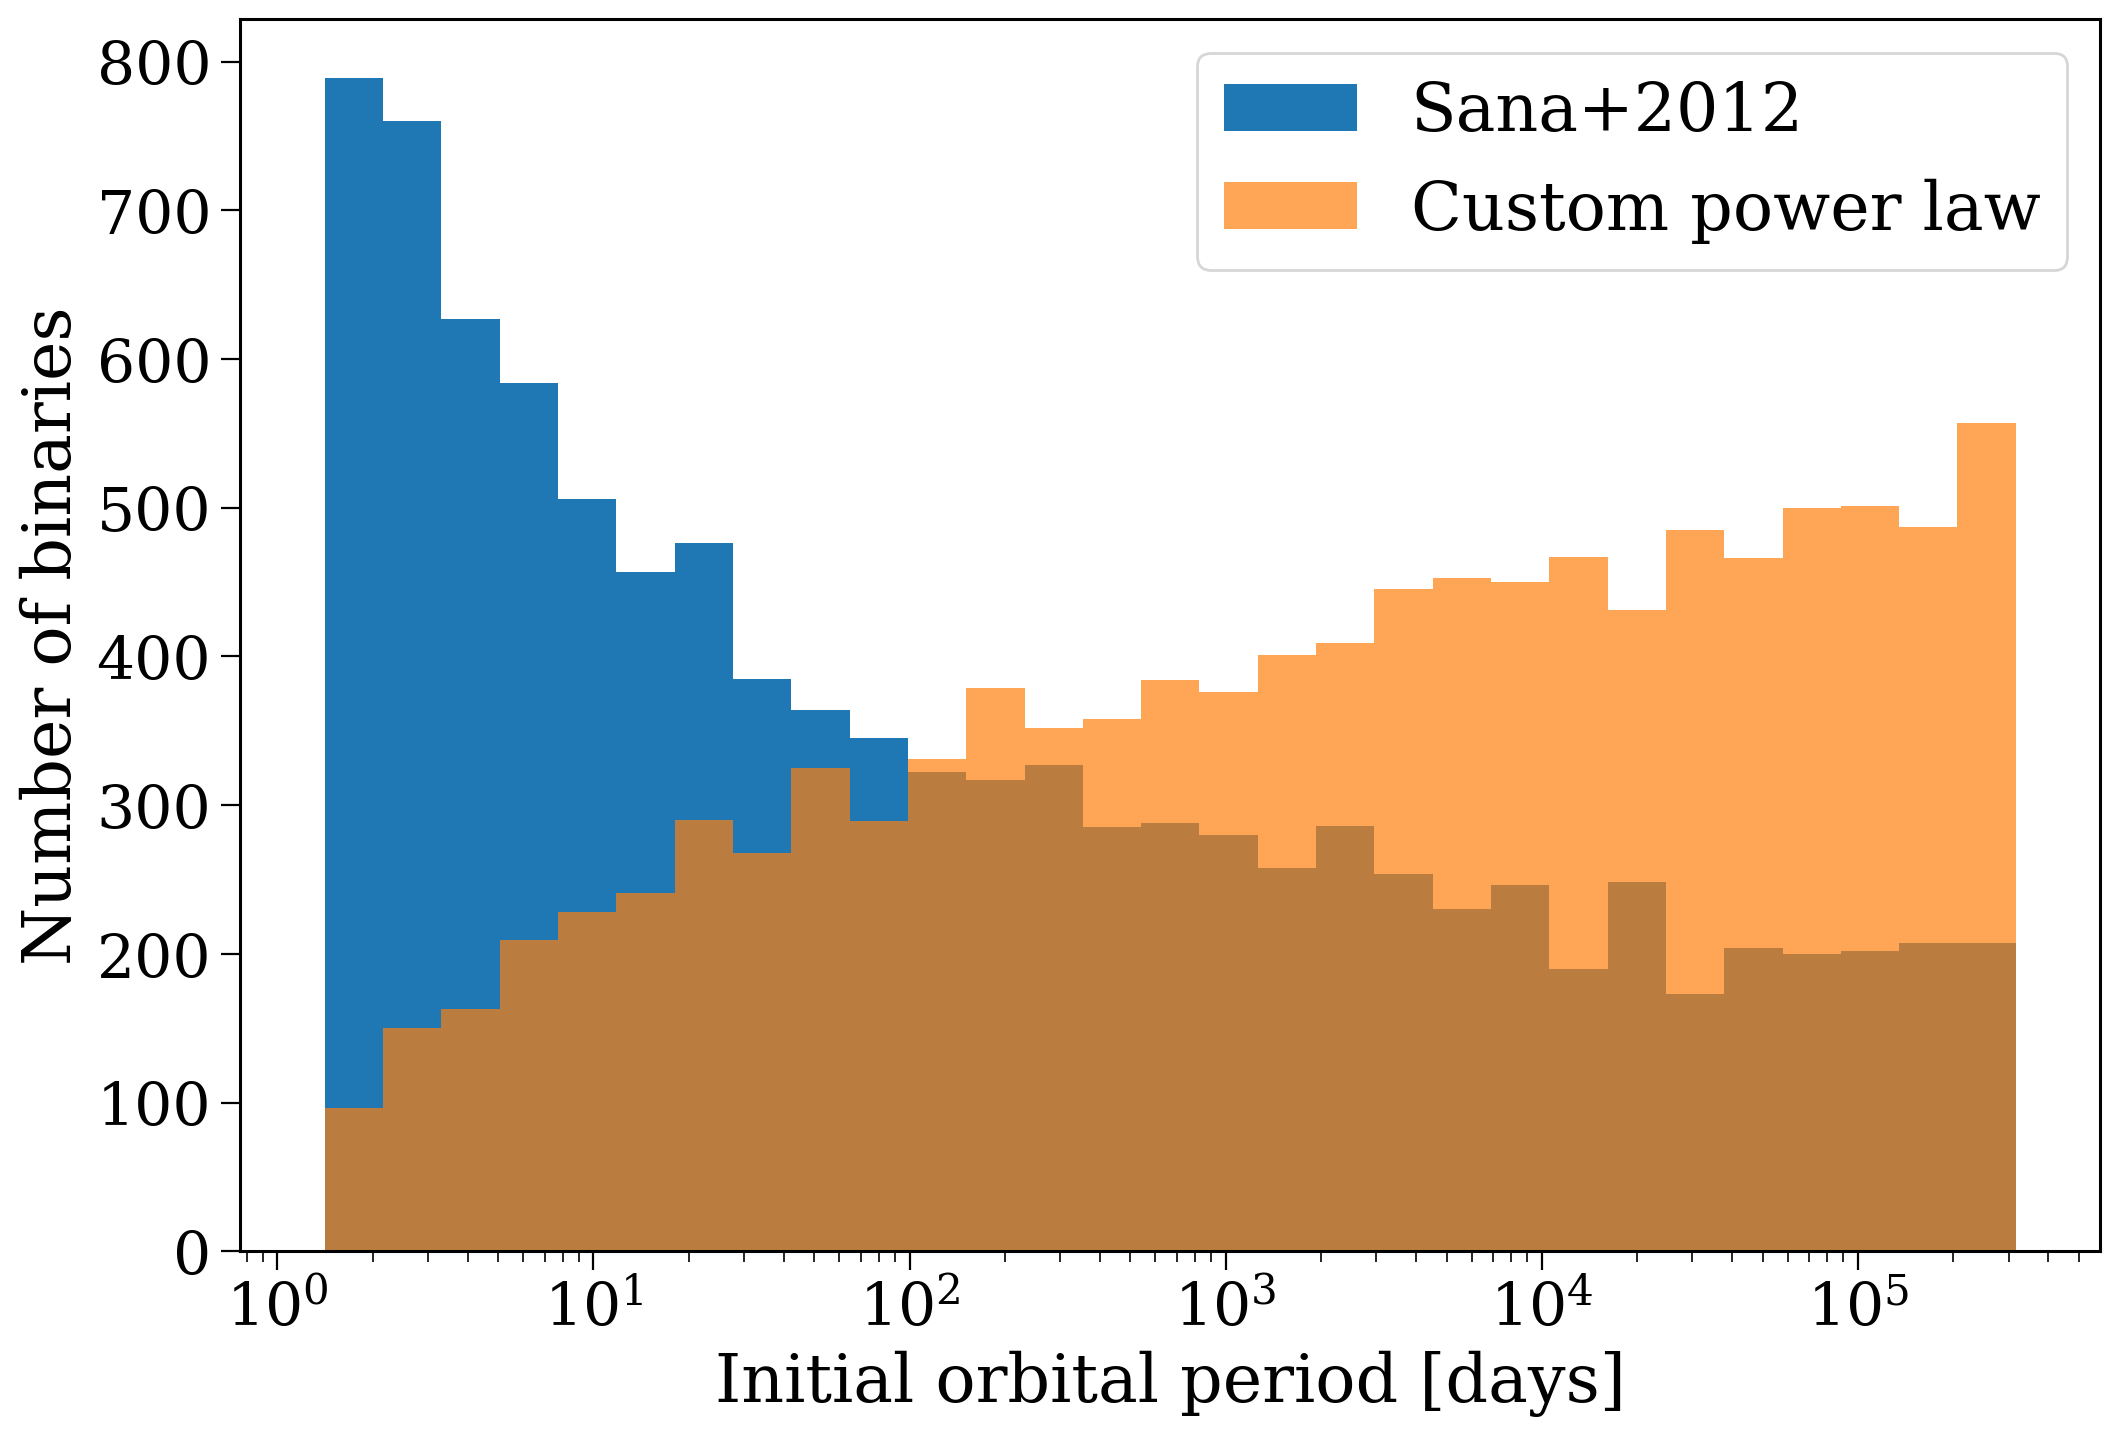

In [ ]:
fig, ax = plt.subplots()

bins = np.logspace(0.15, 5.5, 30)
ax.hist(fiducial.initial_binaries["porb"], bins=bins, label="Sana+2012")
ax.hist(diff_porb.initial_binaries["porb"], bins=bins, label="Custom power law", alpha=0.7)
ax.set(
    xscale="log",
    xlabel="Initial orbital period [days]",
    ylabel="Number of binaries",
)
ax.legend()
plt.show()

In [88]:
for pop, label in [(fiducial, "Sana+2012"), (diff_porb, "Custom power law")]:
    n_mergers = (pop.final_bpp["sep"] == 0.0).sum()
    print(f"Number of mergers with {label} porb distribution:", n_mergers)

Number of mergers with Sana+2012 porb distribution: 7435
Number of mergers with Custom power law porb distribution: 5089


### Binary physics settings

In [89]:
weak_kick = template.copy()
weak_kick.BSE_settings["sigma"] = 20  # km/s
weak_kick.perform_stellar_evolution()
weak_kick.perform_galactic_evolution()

11058it [00:22, 490.30it/s]                           
cogsworth warning: 30 orbit(s) failed numerical integration, removing them. This can occur due to NaNs in stellar evolution or extreme orbits that Gala cannot handle. Information for these systems was saved to `./bad_orbits_4.h5`. This includes their initC, bpp, kick_info, and initial galaxy objects.


In [90]:
for pop, label in [(fiducial, "Fiducial"), (weak_kick, "Weak kicks")]:
    n_disrupted = pop.disrupted.sum()
    print(f"Number of disrupted binaries with {label}:", n_disrupted)

Number of disrupted binaries with Fiducial: 1504
Number of disrupted binaries with Weak kicks: 1011


In [91]:
fid_dis_nums = fiducial.bin_nums[fiducial.disrupted]
weak_dis_nums = weak_kick.bin_nums[weak_kick.disrupted]

# find one that is disrupted in fiducial but not in weak_kick
example = weak_kick.bin_nums[np.isin(weak_kick.bin_nums, fid_dis_nums) & ~np.isin(weak_kick.bin_nums, weak_dis_nums)][0]

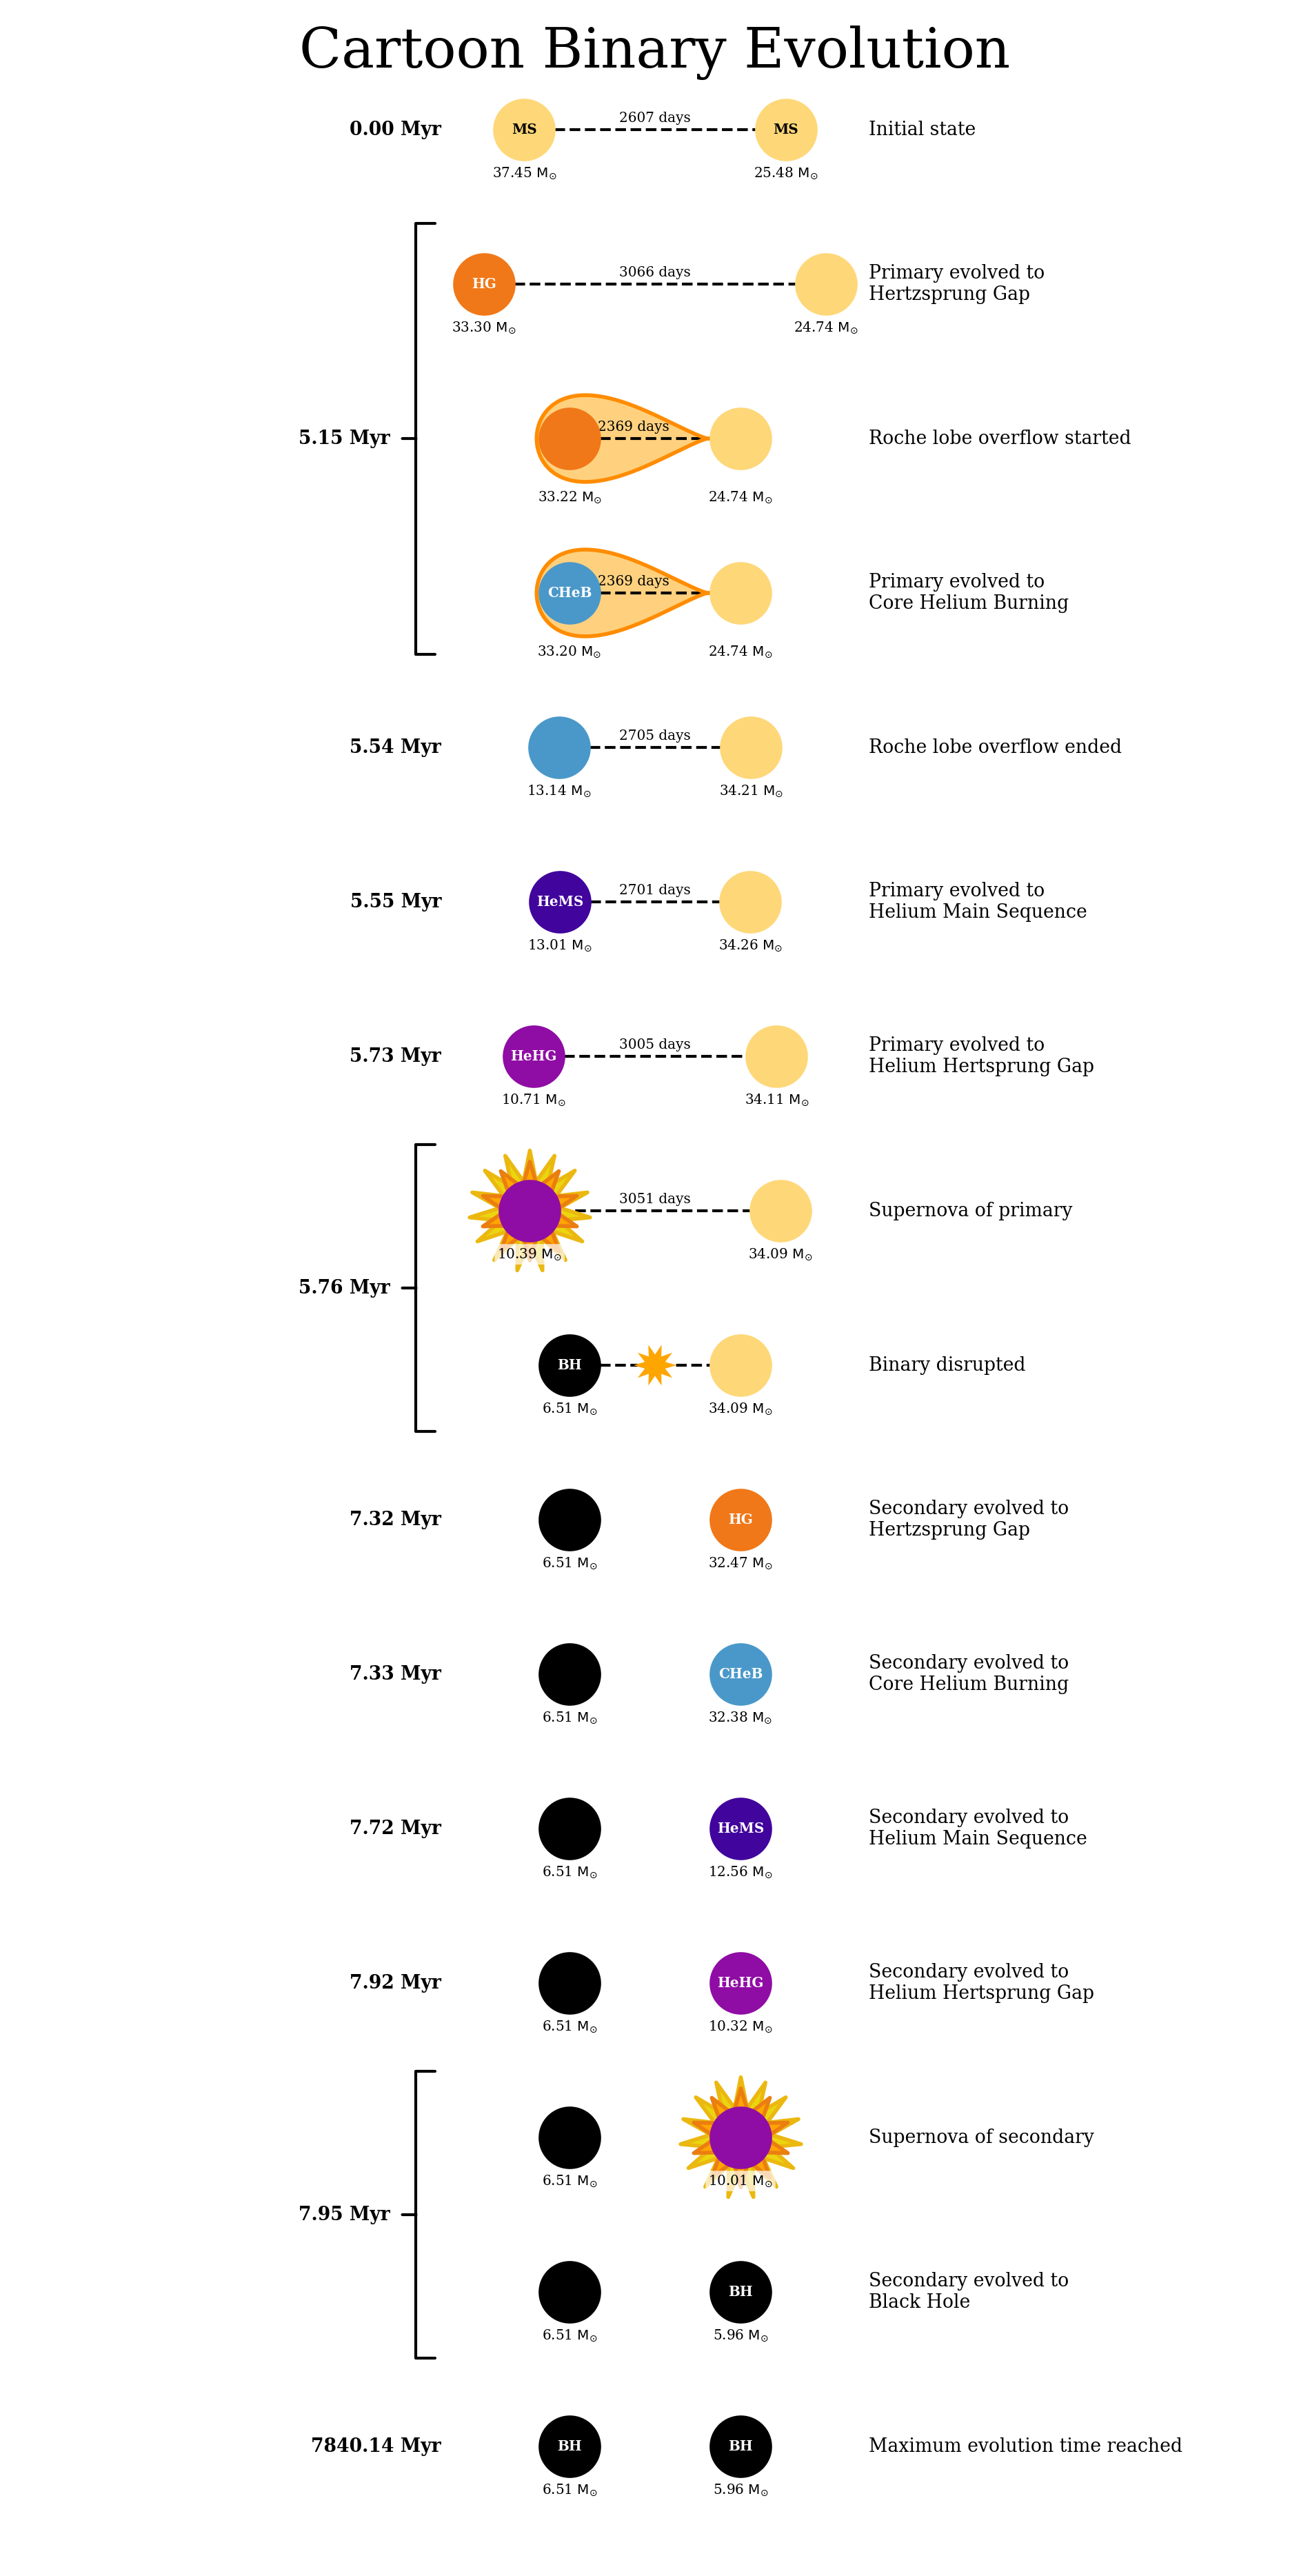

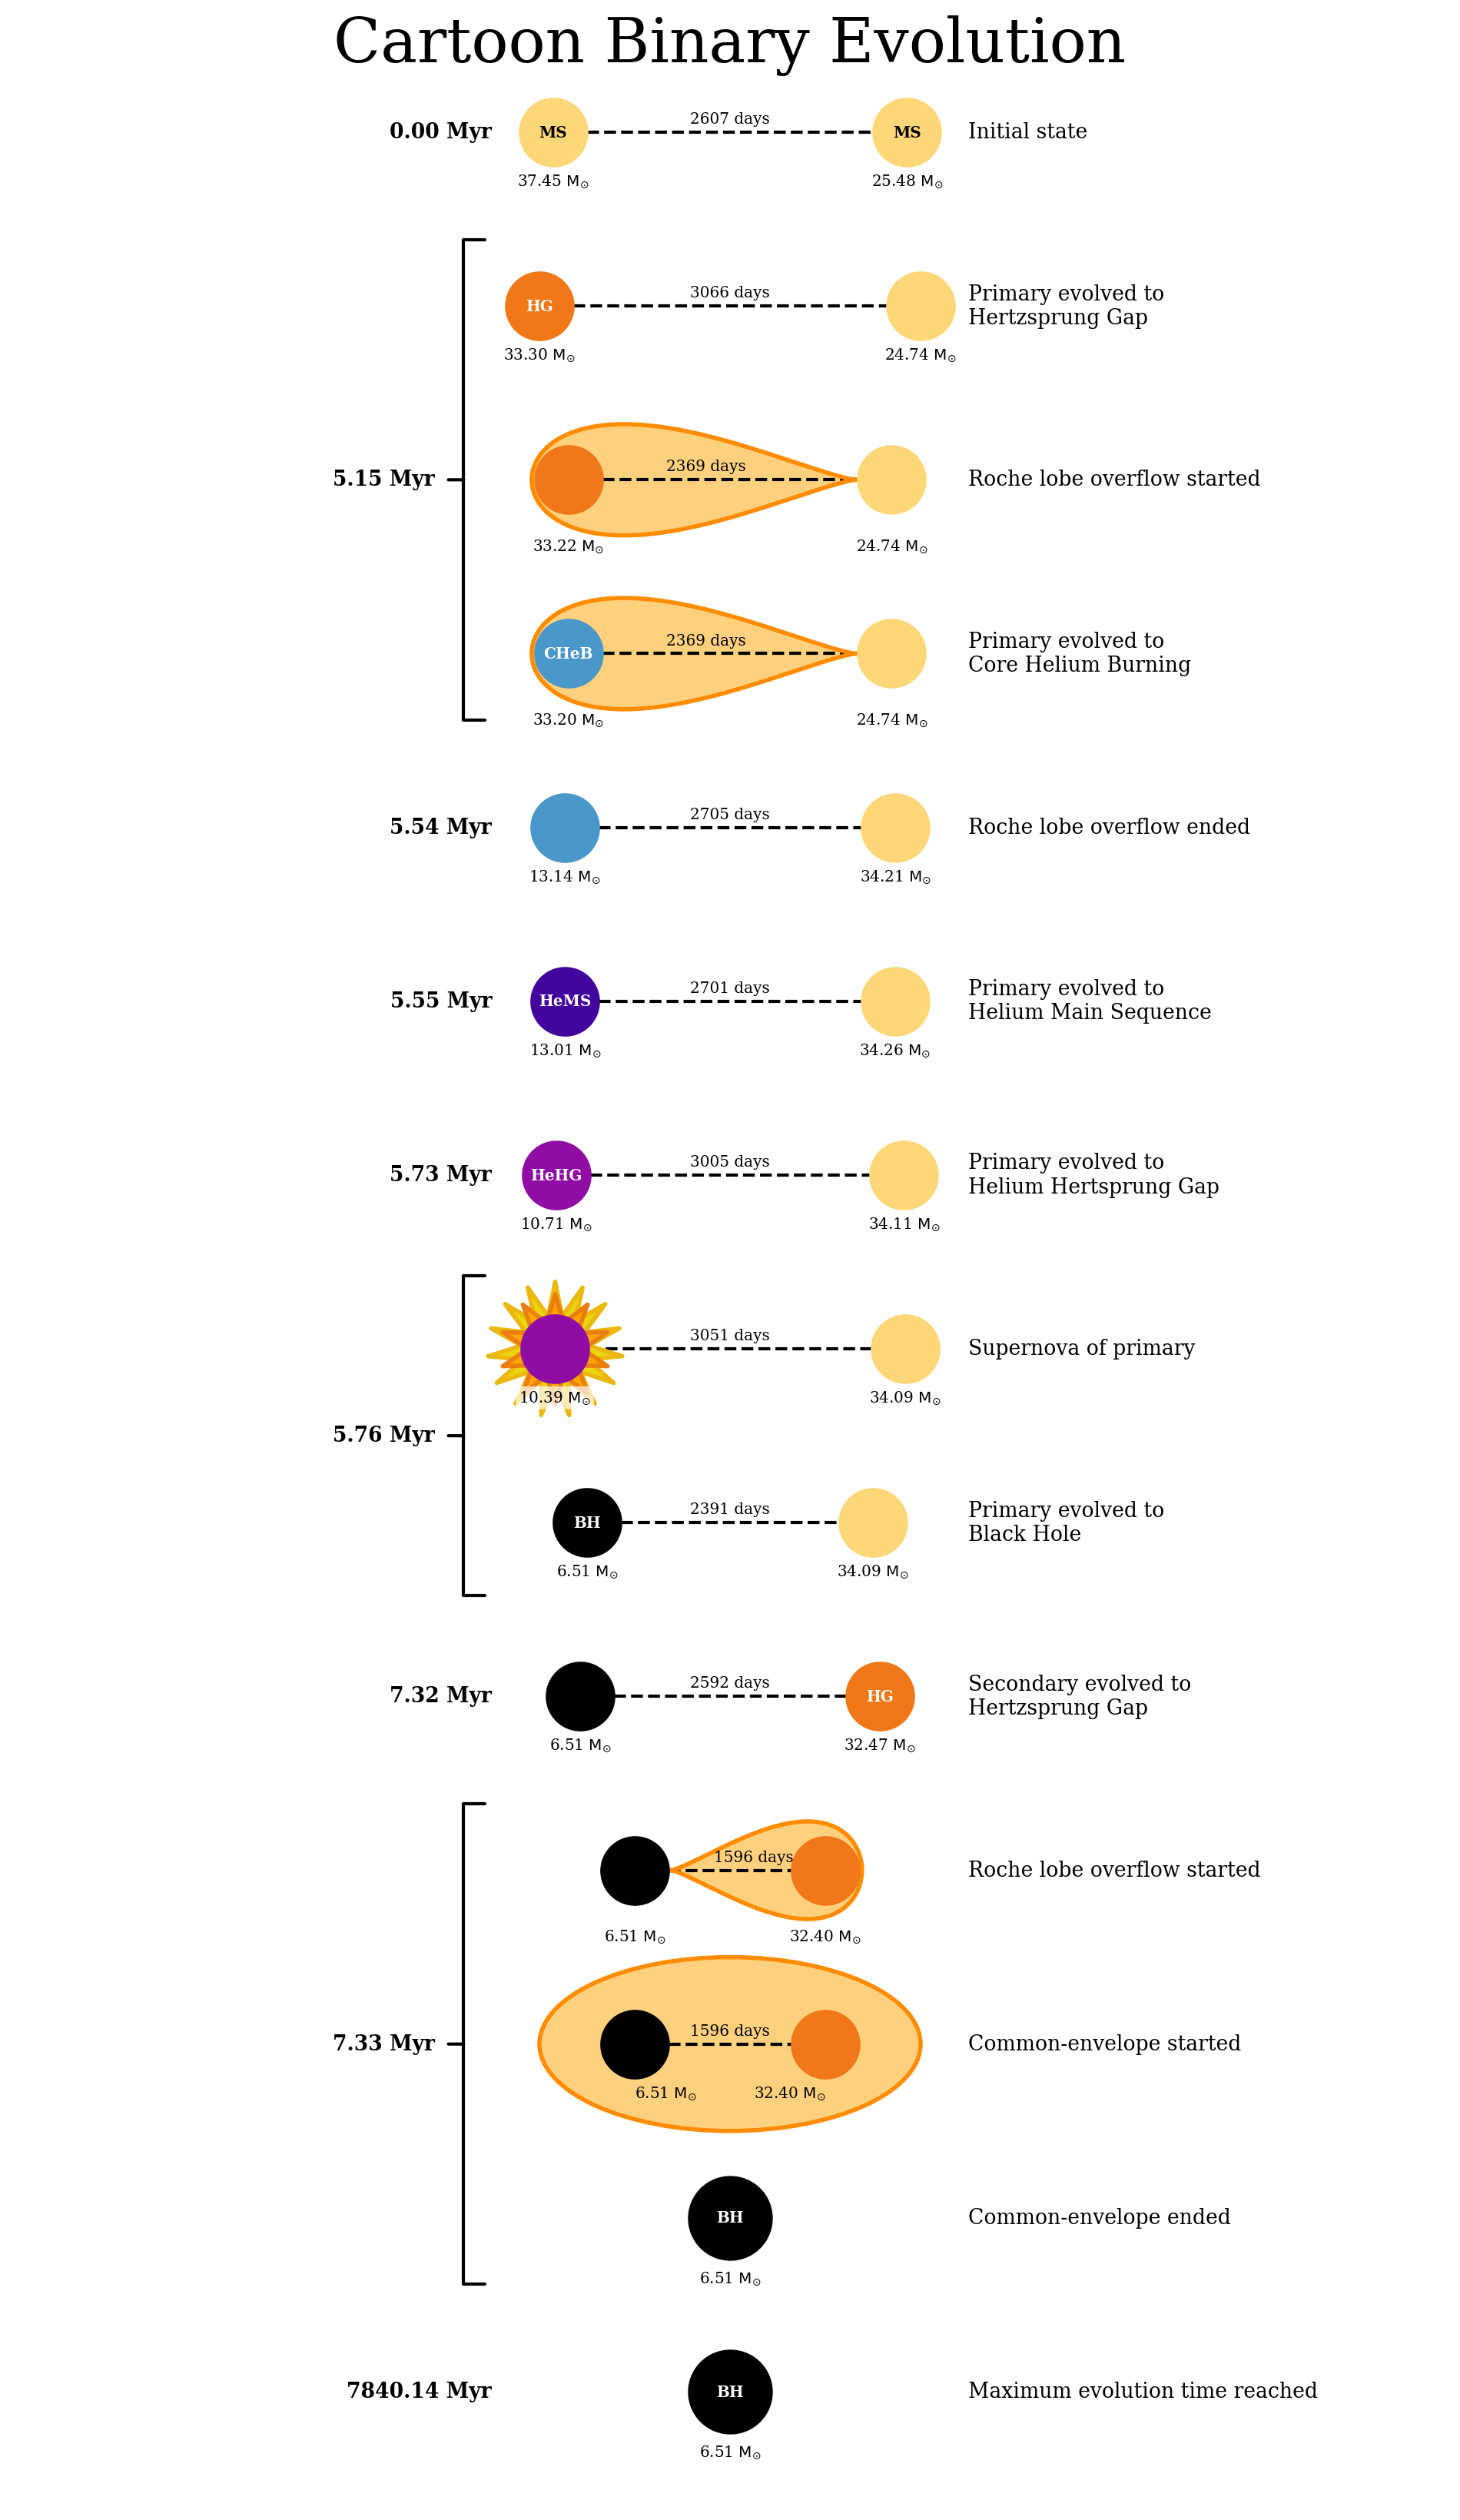

In [92]:
for pop, label in [(fiducial, "Fiducial"), (weak_kick, "Weak kicks")]:
    pop.plot_cartoon_binary(example)

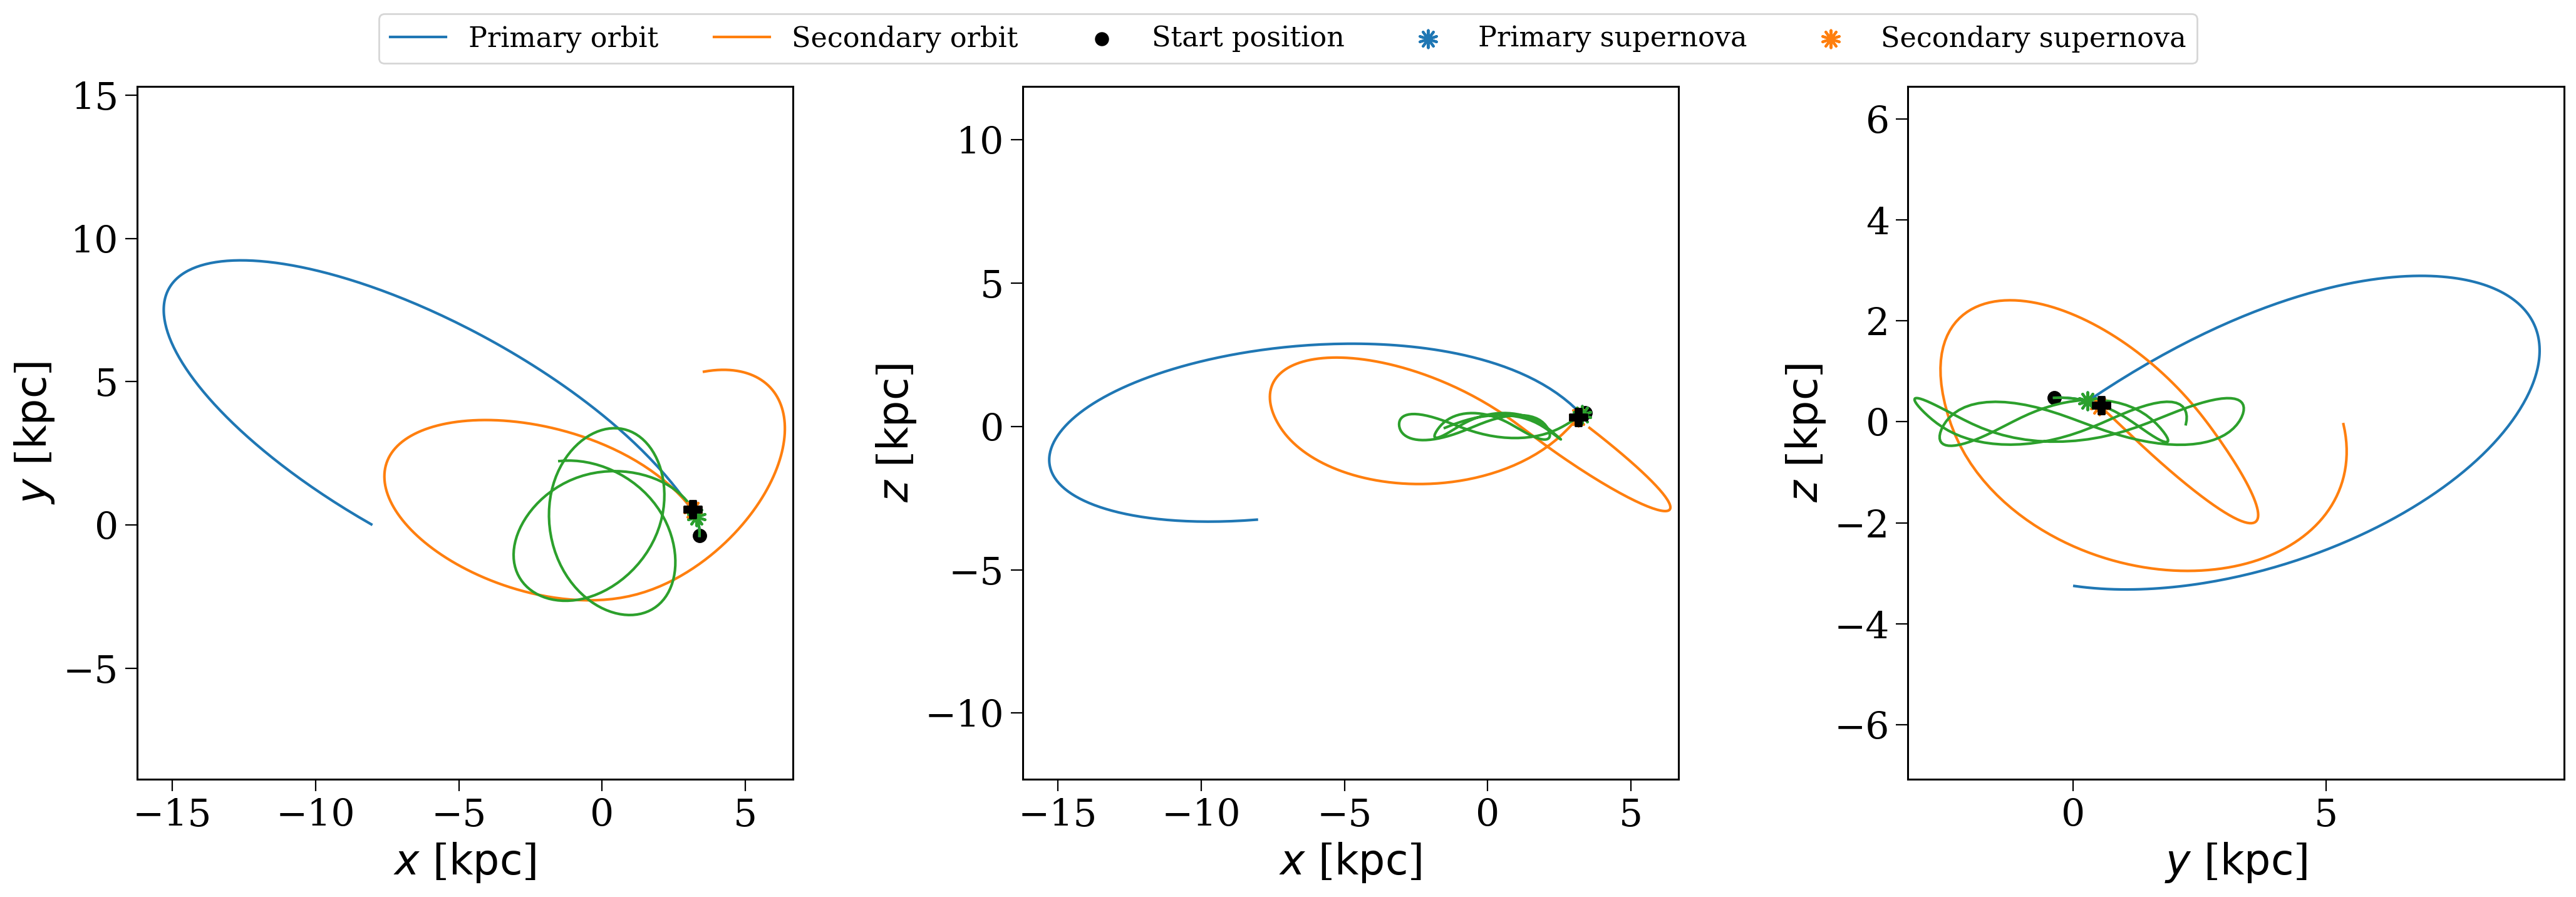

In [ ]:
fig, axes = fiducial.plot_orbit(example, show=False, t_max=200 * u.Myr)
fig, axes = weak_kick.plot_orbit(example, fig=fig, axes=axes, show_legend=False, t_max=200 * u.Myr)

### Galactic potential

In [95]:
nfw = gp.NFWPotential(m=1e12, r_s=15.63, units="galactic")

nfw_pop = fiducial.copy()
nfw_pop.galactic_potential = nfw
nfw_pop.perform_galactic_evolution()

11521it [00:19, 580.29it/s]                           


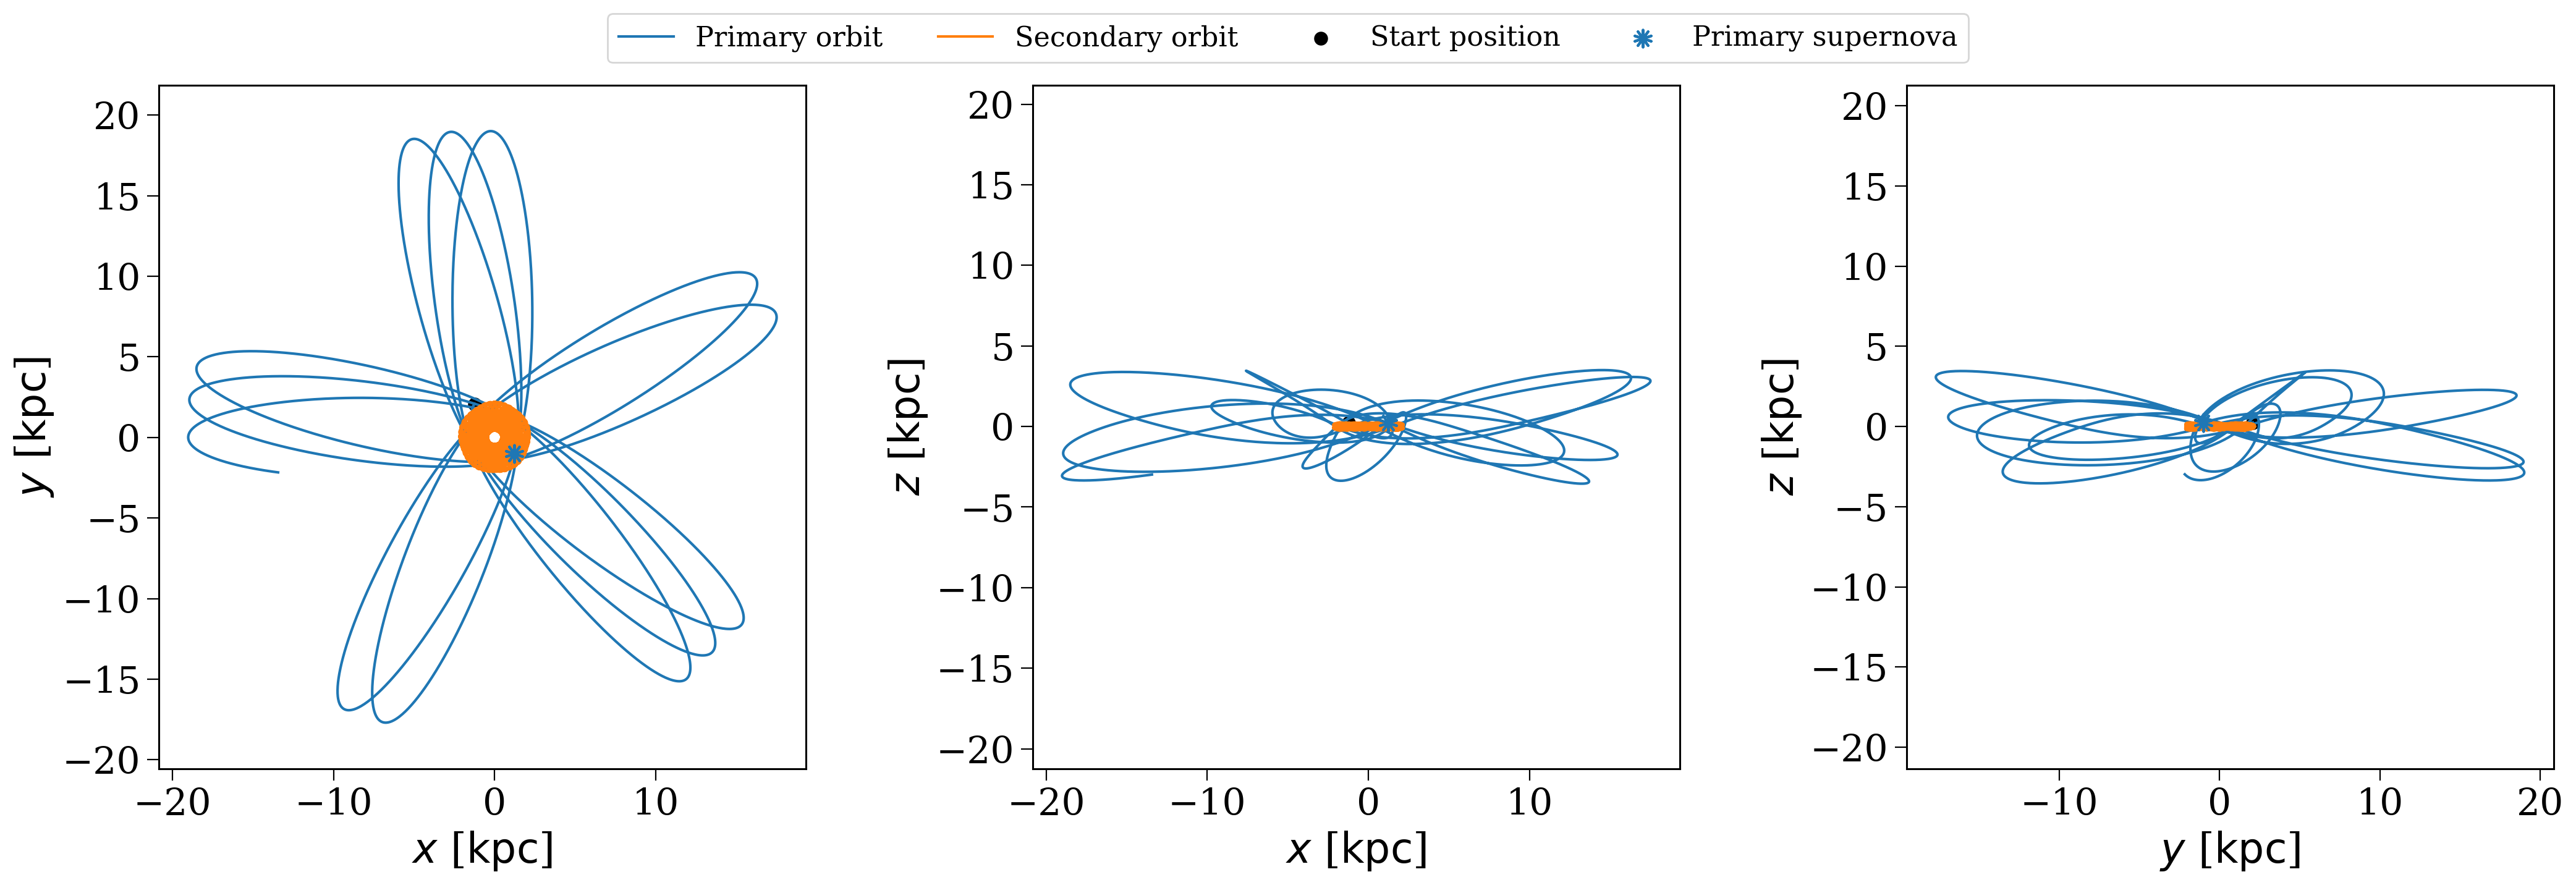

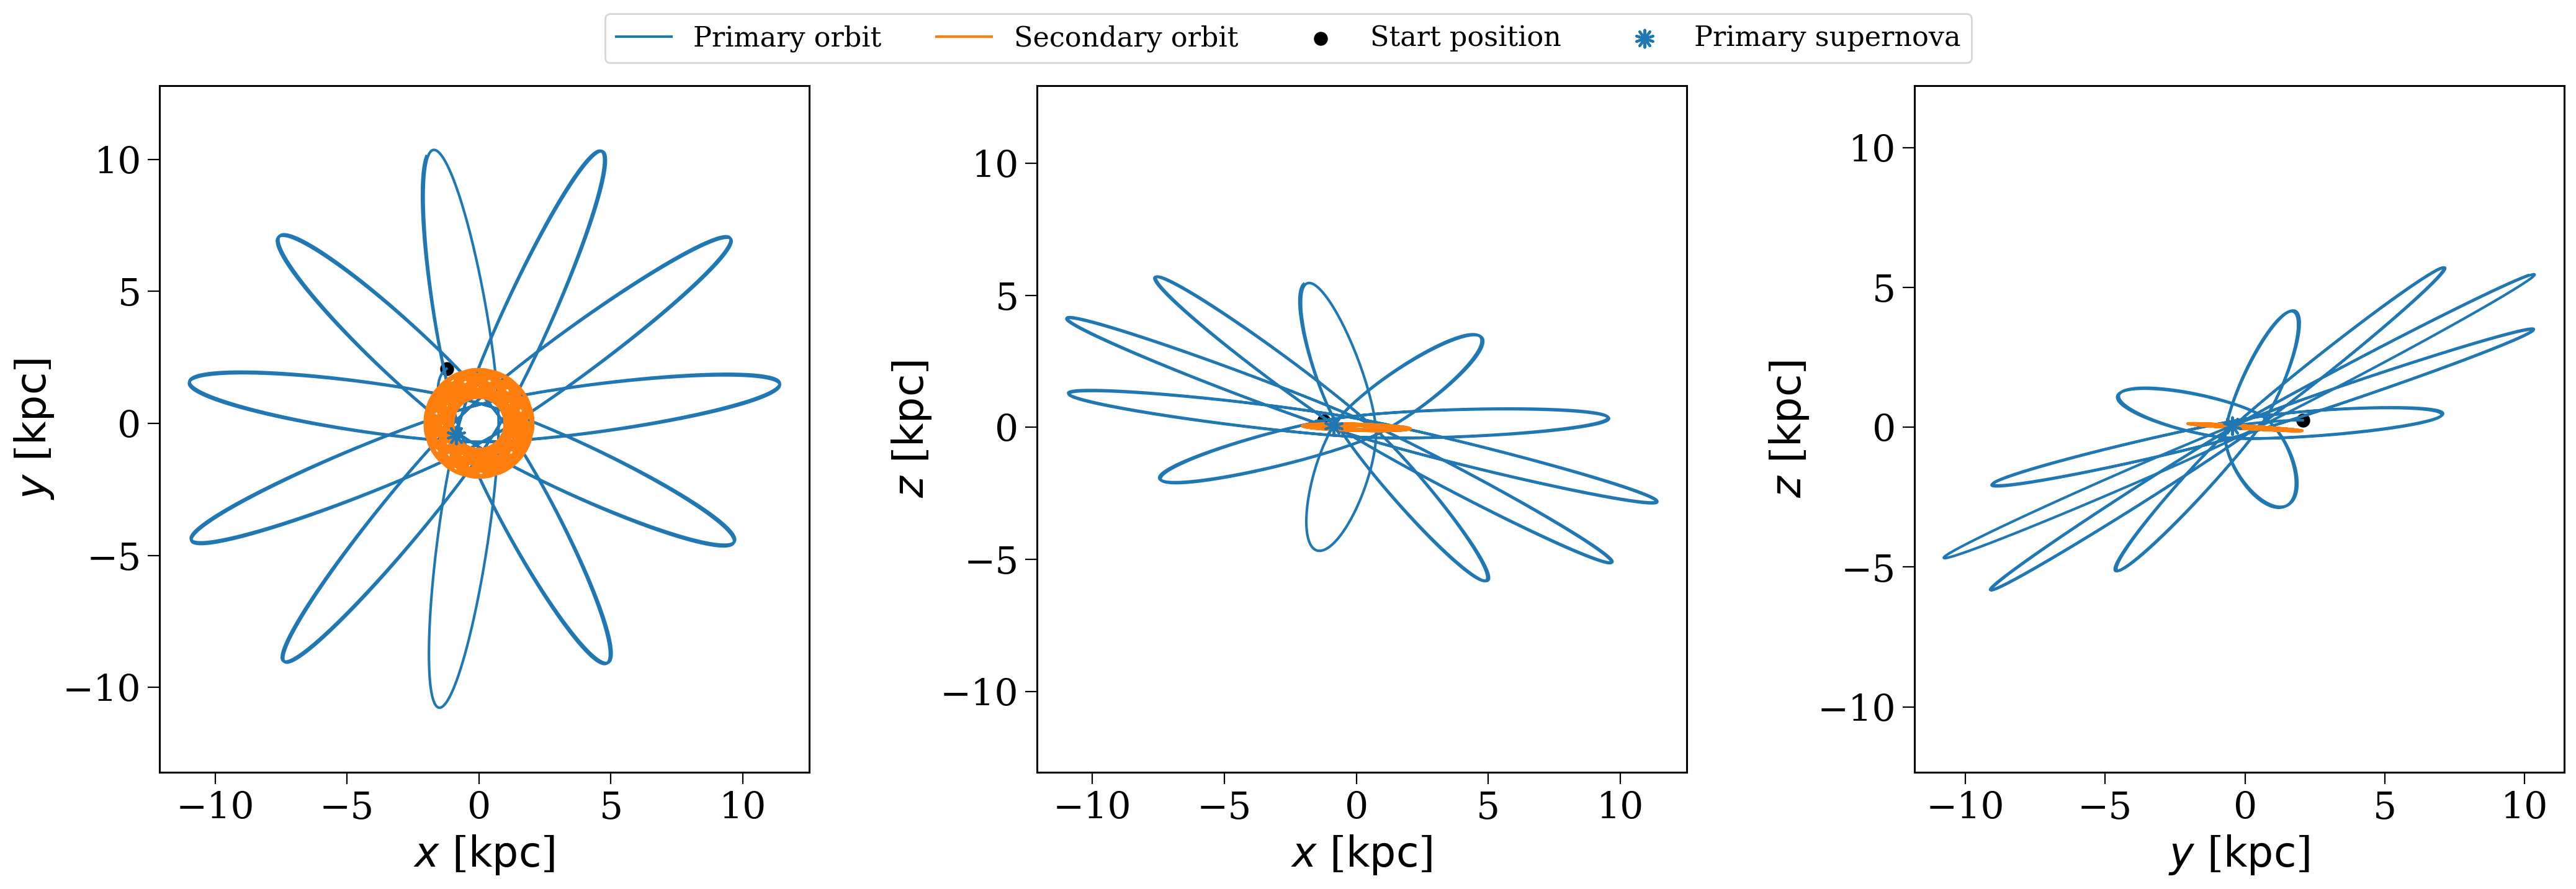

In [ ]:
disrupted_num = fiducial.bin_nums[fiducial.disrupted][14]
for pop, label in [(fiducial, "fid"), (nfw_pop, "nfw")]:
    fig, axes = pop.plot_orbit(disrupted_num)

## Tasks

### 4.1: Vary your initial conditions

#### 4.1.1: Choose an initial condition

Choose an initial condition to vary! Your full range of options is given [here in the COSMIC docs](https://cosmic-popsynth.github.io/COSMIC/pages/inifile.html#sampling).

Some inspiration for you:

- You could try one of the other built-in initial orbital period distributions?
- How does making the initial population entirely circular change things?
- What if you set the minimum mass ratio to a larger value like 0.5?

In [32]:
# your code here

#### 4.1.2: Compare initial distributions

Create a template population and then make two copies of it. For one copy, your "fiducial" simulation, just call ``fiducial.create_population()`` to create the population and then evolve it.
            
For the other copy, change one of the sampling parameters like how we did above, and then re-run the sampling step and the evolution steps.

Make a plot of the initial distribution that you changed for both populations to check that it changed in the way you expected.

In [33]:
# your code here

#### 4.1.3: Effect on supernovae

Use your code from Part 3 to get the timing and location of all supernovae in both populations. How do the supernova properties change when you change the initial conditions?

In [34]:
# your code here

### 4.2: Vary your binary physics assumptions

#### 4.2.1: Choose a setting

Choose a binary physics assumption to vary! Your full range of options is given [here in the COSMIC documentation](https://cosmic-popsynth.github.io/COSMIC/pages/inifile.html#binary-physics)

Some inspiration for you:

- Perhaps you could make common-envelopes 10x more efficient (``alpha1 = 10``)?
- What if you make stable mass transfer always nonconservative (``acc_lim = 0``)?
- Or maybe change how angular momentum is lost during Roche-lobe overflow at super-Eddington mass transfer rates? (``gamma``)?

In [35]:
# your code here

#### 4.2.2: Compare evolution

Create a template population and then make two copies of it. For one copy, your "fiducial" simulation, just call ``fiducial.create_population()`` to create the population and then evolve it.
            
For the other copy, change one of the binary physics parameters like how we did above, and then run just the stellar evolution and galactic evolution steps (be careful not to do the sampling or you'll get a different initial population!).

Pick a random binary in both populations and plot a cartoon of its evolution in both cases. Does it change how you would expect?

In [36]:
# your code here

#### 4.2.3: Effect on supernovae

Use your code from Part 3 to get the timing and location of all supernovae in both populations. How do the supernova properties change when you change the binary physics assumptions?

In [ ]:
# your code here

### 4.3: Vary galactic potential

#### 4.3.1: Choose a potential

Try creating a different galactic potential and evolving your population through it! You can use any of the potentials implemented in [gala](https://gala.adrian.pw/en/latest/potential/index.html), but I'd probably recommend an NFW potential or a Miyamoto-Nagai potential for this task, with masses similar to the Milky Way.

In [ ]:
# your code here

#### 4.3.2: Compare orbits

Create a template population and then make two copies of it. For one copy, your "fiducial" simulation, just call ``fiducial.create_population()`` to create the population and then evolve it.
            
For the other copy, update the potential like how we did above, and then run just the galactic evolution steps (be careful not to do the sampling or stellar evolution or you'll get a different initial population!).

Pick a random binary in both populations and plot its galactic orbit. Does it change how you would expect?

In [ ]:
# your code here

#### 4.3.3: Effect on supernovae

Use your code from Part 3 to get the timing and location of all supernovae in both populations. How do the supernova properties change when you change the galactic potential?

In [37]:
# your code here